# Brain Stroke Prediction Dataset

A stroke is a medical condition in which poor blood flow to the brain causes cell death.There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. 
to answer below questions about the dataset 
-  Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [2]:
#Reading the brain stroke data
data=pd.read_csv("full_data.csv")

### The dataset consists of:

- 10 health conditions and other basic lifestyle info of patients i.e. gender, age, hypertension, heartdisease, evermarried, worktype, Residencetype, avgglucoselevel, bmi, smoking status - The independent variables
- Whether the patient had a stroke - The dependent variable
- The stroke column is 1 if the patient had a stroke or 0 if not.
- There are a total of 4981 observations.

#### Columns Information
1) gender: "Male", "Female" or "Other"<br>
2) age: age of the patient<br>
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
4) heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
5) evermarried: "No" or "Yes"<br>
6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed"<br>
7) Residencetype: "Rural" or "Urban"<br>
8) avgglucoselevel: average glucose level in blood<br>
9) bmi: body mass index<br>
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
11) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Let the features be divided into two categories before we start EDA:
1) Categorical : gender, ever_married, work_type, residence_type, smoking_status<br>
2) Numerical : age, hypertension, heart_disease, avg_glucose_level, bmi
 * hyoertension & heart_disease have int dtypes, but we can check out that they are in categorical style

In [3]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
#checking if any data is missing
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#convering categorical features to numerical
data['gender'] = data['gender'].map({'Male':1,'Female':0})
data['ever_married'] = data['ever_married'].map({'Yes':1,'No':0})
data = pd.get_dummies(data,columns=['work_type','smoking_status','Residence_type'],drop_first=True)

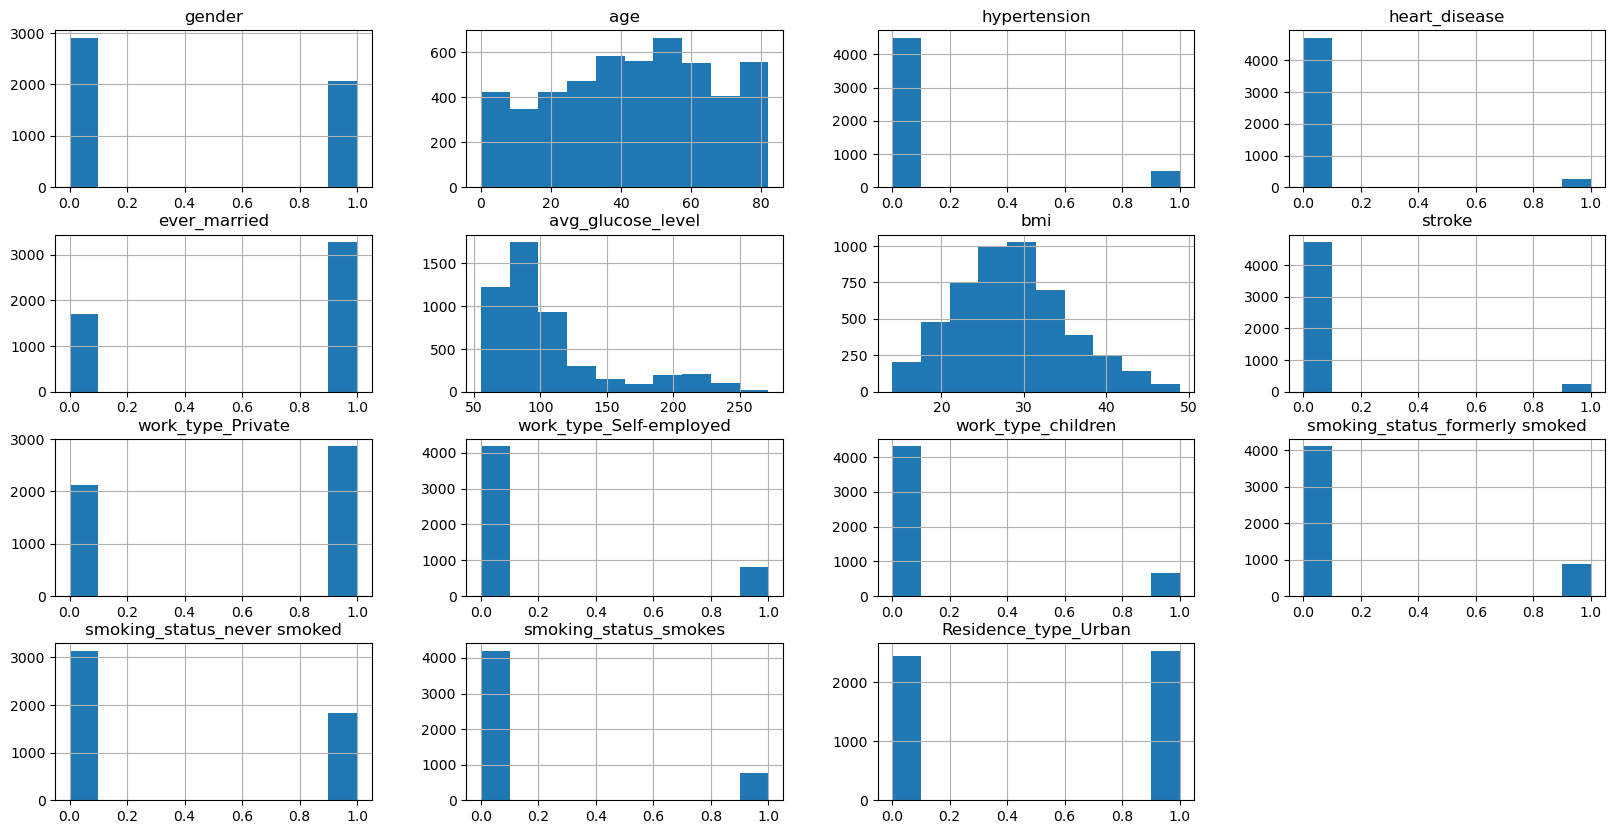

In [10]:
import pylab as pl
data.hist(figsize=(20,10))
pl.show()

<AxesSubplot:>

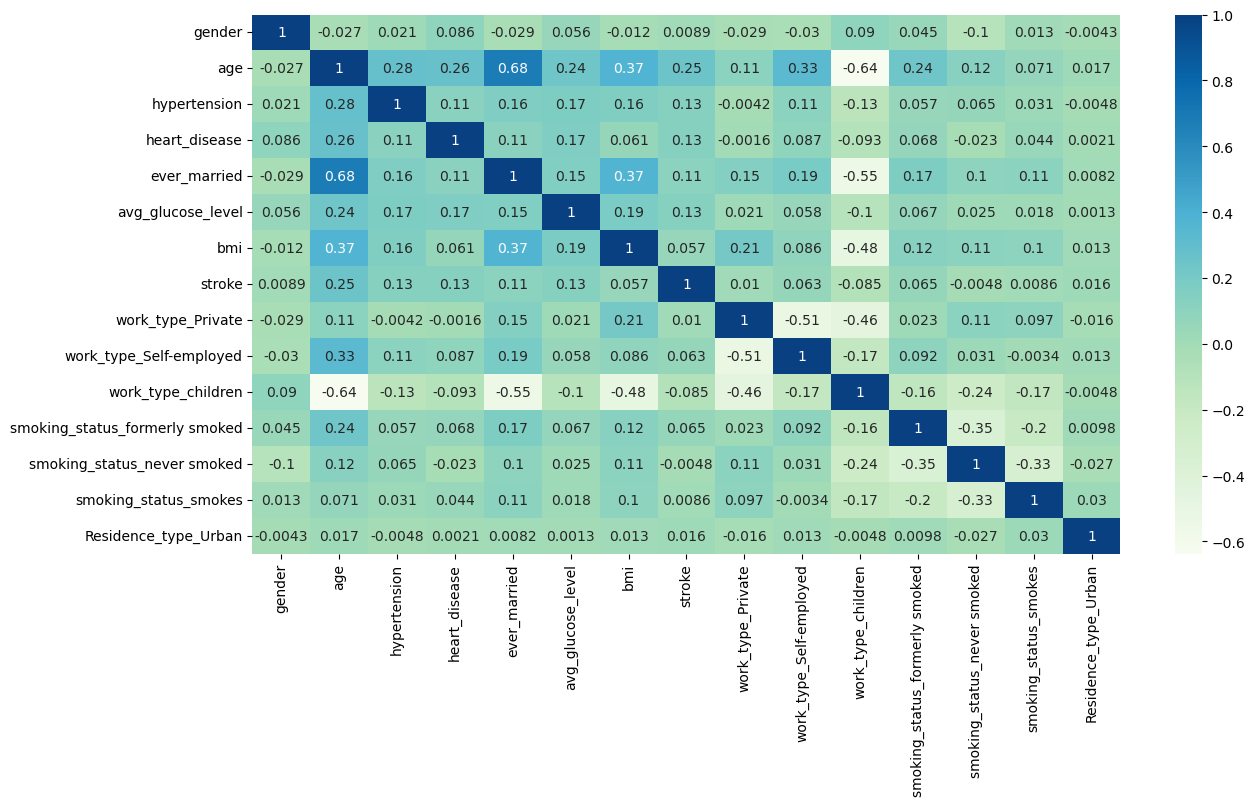

In [11]:
#the heat map of the correlation
correlation = data.corr()
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'GnBu')

We can find that in original numeric variables, the co-relation between age and bmi being the highest.

## Train Models Using H2O.ai and evaluation

In [12]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [13]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

In [14]:
target='stroke'
min_mem_size=6 
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [15]:
# 65535 Highest port no
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:8544 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "16.0.2" 2021-07-20; Java(TM) SE Runtime Environment (build 16.0.2+7-67); Java HotSpot(TM) 64-Bit Server VM (build 16.0.2+7-67, mixed mode, sharing)
  Starting server from /Users/fuyanping/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/76/8dzs0wj93n5891mn1bwtk2xc0000gn/T/tmp0qjlfeup
  JVM stdout: /var/folders/76/8dzs0wj93n5891mn1bwtk2xc0000gn/T/tmp0qjlfeup/h2o_fuyanping_started_from_python.out
  JVM stderr: /var/folders/76/8dzs0wj93n5891mn1bwtk2xc0000gn/T/tmp0qjlfeup/h2o_fuyanping_started_from_python.err
  Server is running at http://127.0.0.1:8544
Connecting to H2O server at http://127.0.0.1:8544 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_fuyanping_nwmnqu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [16]:
# upload data frame in H2O environment
df_hex = h2o.H2OFrame(data)
# convert target to categorical
df_hex['stroke'] = df_hex['stroke'].asfactor()
x = df_hex.columns
x.remove(target)
print(x)

# train / test split (70/30)
train, test = df_hex.split_frame(seed=1)
train['stroke'] = train['stroke'].asfactor()
test['stroke'] = test['stroke'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'Residence_type_Urban']


In [17]:
df_hex.cor()

gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
1,-0.0265384,0.0214848,0.0864755,-0.0289711,0.0557959,-0.0120929,0.00886987,-0.0287064,-0.0296346,0.0902753,0.0451089,-0.102387,0.0133494,-0.00430116
-0.0265384,1,0.27812,0.264852,0.677137,0.236763,0.373703,0.246478,0.11102,0.326835,-0.636866,0.235508,0.122617,0.0708994,0.0171545
0.0214848,0.27812,1,0.111974,0.164534,0.170028,0.158762,0.131965,-0.00417718,0.110468,-0.128924,0.0567975,0.065267,0.0307489,-0.00475503
0.0864755,0.264852,0.111974,1,0.114765,0.166847,0.0609265,0.13461,-0.00160001,0.0874741,-0.092974,0.0675413,-0.0227269,0.0440108,0.00212545
-0.0289711,0.677137,0.164534,0.114765,1,0.150724,0.37169,0.108398,0.146139,0.191668,-0.548851,0.172039,0.10412,0.106234,0.00819076
0.0557959,0.236763,0.170028,0.166847,0.150724,1,0.186348,0.133227,0.0207636,0.0584194,-0.10196,0.066989,0.0247266,0.0178727,0.00134561
-0.0120929,0.373703,0.158762,0.0609265,0.37169,0.186348,1,0.0569257,0.21182,0.0855815,-0.484257,0.120156,0.109322,0.10071,0.0131849
0.00886987,0.246478,0.131965,0.13461,0.108398,0.133227,0.0569257,1,0.0104588,0.0626429,-0.0850746,0.06532,-0.00480609,0.00856073,0.0164941
-0.0287064,0.11102,-0.00417718,-0.00160001,0.146139,0.0207636,0.21182,0.0104588,1,-0.509458,-0.458968,0.0226848,0.109936,0.0967694,-0.0161038
-0.0296346,0.326835,0.110468,0.0874741,0.191668,0.0584194,0.0855815,0.0626429,-0.509458,1,-0.173407,0.092186,0.0308978,-0.00339571,0.0134271


We can find that the co-relation between 'age' and 'ever_married' being the highest.
### Evaluation metrics
H2O provides a variety of metrics that can be used for evaluating models. <br>
The **MSE** metric measures the average of the squares of the errors or deviations.The smaller the MSE, the better the model’s performance.<br>
The **RMSE** metric evaluates how well a model can predict a continuous value. The RMSE units are the same as the predicted target, which is useful for understanding if the size of the error is of concern or not. The smaller the RMSE, the better the model’s performance.<br>
The **R2** value represents the degree that the predicted value and the actual value move in unison. The R2 value varies between 0 and 1 where 0 represents no correlation between the predicted and actual value and 1 represents complete correlation.<br>
The logarithmic loss metric(**logloss**) can be used to evaluate the performance of a binomial or multinomial classifier. <br>
**AUC** (Area Under the ROC Curve) is used to evaluate how well a binary classification model is able to distinguish between true positives and false positives. An AUC of 1 indicates a perfect classifier, while an AUC of .5 indicates a poor classifier, whose performance is no better than random guessing.<br>
**AUCPR** (Area Under the Precision-Recall Curve) is used to evaluate how well a binary classification model is able to distinguish between precision recall pairs or points.<br>

### Classification
In binary classification training, 'stroke' is our target variable, and we using automl and GeneralizedLinear model to make prediction training.

In [18]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1,max_runtime_secs=run_time,exclude_algos = ['DeepLearning'],nfolds = 2, keep_cross_validation_models=True)
aml.train(x=x, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20221107_222117

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.036568215968284946
RMSE: 0.19122817775705794
LogLoss: 0.13222266972032046
AUC: 0.9180219194853276
AUCPR: 0.5263156951231699
Gini: 0.8360438389706553
Null degrees of freedom: 3748
Residual degrees of freedom: 3743
Null deviance: 1509.3024608771314
Residual deviance: 991.4055775629629
AIC: 1003.4055775629629

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25794931441692764
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      3506  52   0.0146   (52.0/3558.0)
1      108   83   0.5654   (108.0/191.0)
Total  3614  135  0.0427   (160.0/3749.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.257949     0.509202  77
max f2                       0.171388     0.572344  136
max f0point5                 0.268985     0.595054  69
max accuracy                 0.273598     0.959723  67
max precision                0.572292     1         0
max recall                   0.00492945   1         384
max specificity              0.572292     1         0
max absolute_mcc             0.268985     0.502948  69
max min_per_class_accuracy   0.0821312    0.832461  228
max mean_per_class_accuracy  0.0604779    0.838453  259
max tns                      0.572292     3558      0
max fns                      0.572292     190       0
max fps                      0.00229178   3558      399
max tps                      0.00492945   191       384
max tnr                      0.572292     1         0
max fnr                      0.572292     0.994764  0
max fpr                      0.00229178   1         399
max tpr                      0.00492945   1         384

Gains/Lift Table: Avg response rate:  5.09 %, avg score:  5.24 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010136                    0.356232           15.496     15.496             0.789474         0.419133    0.789474                    0.419133            0.157068        0.157068                   1449.6    1449.6             0.15482
2        0.0200053                   0.309334           13.2623    14.3941            0.675676         0.329018    0.733333                    0.374676            0.13089         0.287958                   1226.23   1339.41            0.282337
3        0.0301414                   0.27094            10.8472    13.2013            0.552632         0.286698    0.672566                    0.345091            0.109948        0.397906                   984.72    1220.13            0.387507
4        0.0400107                   0.245838           5.30494    11.2535            0.27027          0.259039    0.573333                    0.323865            0.052356        0.450262                   430.494   1025.35            0.432274
5        0.0501467                   0.221908           5.68187    10.1274            0.289474         0.233168    0.515957                    0.305532            0.0575916       0.507853                   468.187   912.735            0.482277
6        0.100027                    0.156633           3.46381    6.80447            0.176471         0.187442    0.346667                    0.246645            0.172775        0.680628                  

#### Examine the top models

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_1_20221107_222117,0.833714,0.155849,0.141459,0.269578,0.20529,0.0421438,546,0.008856,GBM
XRT_1_AutoML_1_20221107_222117,0.827465,0.164375,0.142138,0.235834,0.204219,0.0417055,256,0.006645,DRF
StackedEnsemble_BestOfFamily_1_AutoML_1_20221107_222117,0.827189,0.157359,0.154506,0.323255,0.205433,0.0422027,2107,0.031288,StackedEnsemble
GLM_1_AutoML_1_20221107_222117,0.827182,0.15602,0.16162,0.294879,0.204064,0.0416422,267,0.03448,GLM
StackedEnsemble_AllModels_1_AutoML_1_20221107_222117,0.826831,0.157508,0.152614,0.332452,0.205399,0.0421886,1436,0.041044,StackedEnsemble
XGBoost_grid_1_AutoML_1_20221107_222117_model_1,0.825913,0.163816,0.138532,0.278514,0.212087,0.044981,232,0.004735,XGBoost
GBM_grid_1_AutoML_1_20221107_222117_model_2,0.824785,0.16119,0.151713,0.339097,0.207811,0.0431854,117,0.006929,GBM
XGBoost_grid_1_AutoML_1_20221107_222117_model_5,0.820216,0.160909,0.136315,0.304666,0.208692,0.0435523,265,0.00502,XGBoost
XGBoost_1_AutoML_1_20221107_222117,0.81891,0.163173,0.125604,0.317529,0.210306,0.0442286,333,0.005522,XGBoost
GBM_5_AutoML_1_20221107_222117,0.818649,0.170196,0.125739,0.283031,0.214943,0.0462006,124,0.006599,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20221107_222117

,0,1,Error,Rate
0,1075.0,100.0,0.0851,(100.0/1175.0)
1,32.0,25.0,0.5614,(32.0/57.0)
Total,1107.0,125.0,0.1071,(132.0/1232.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

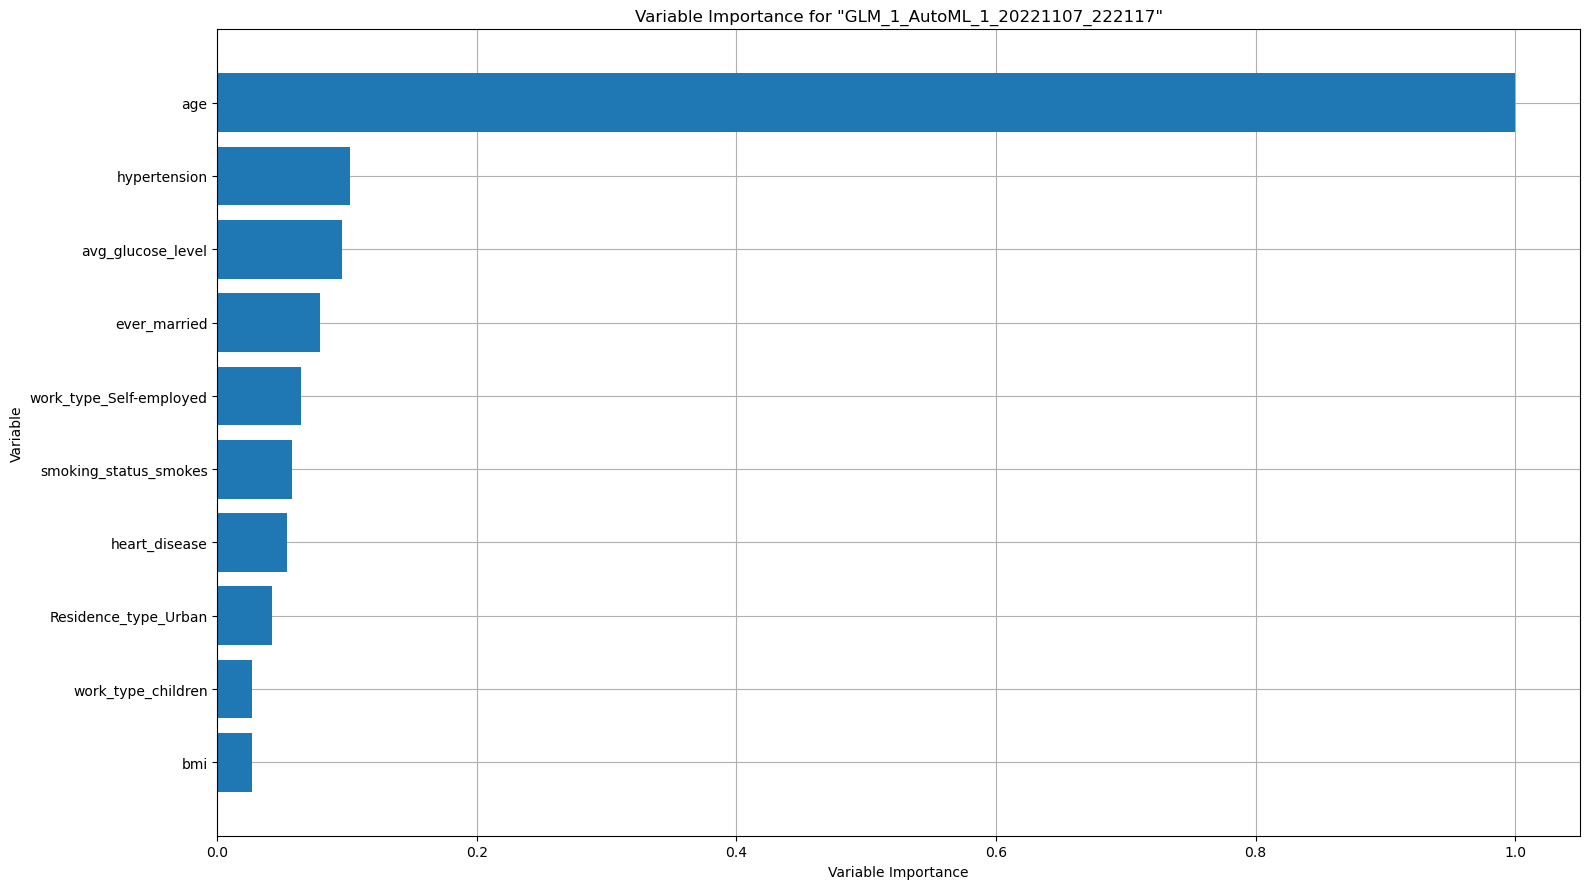

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

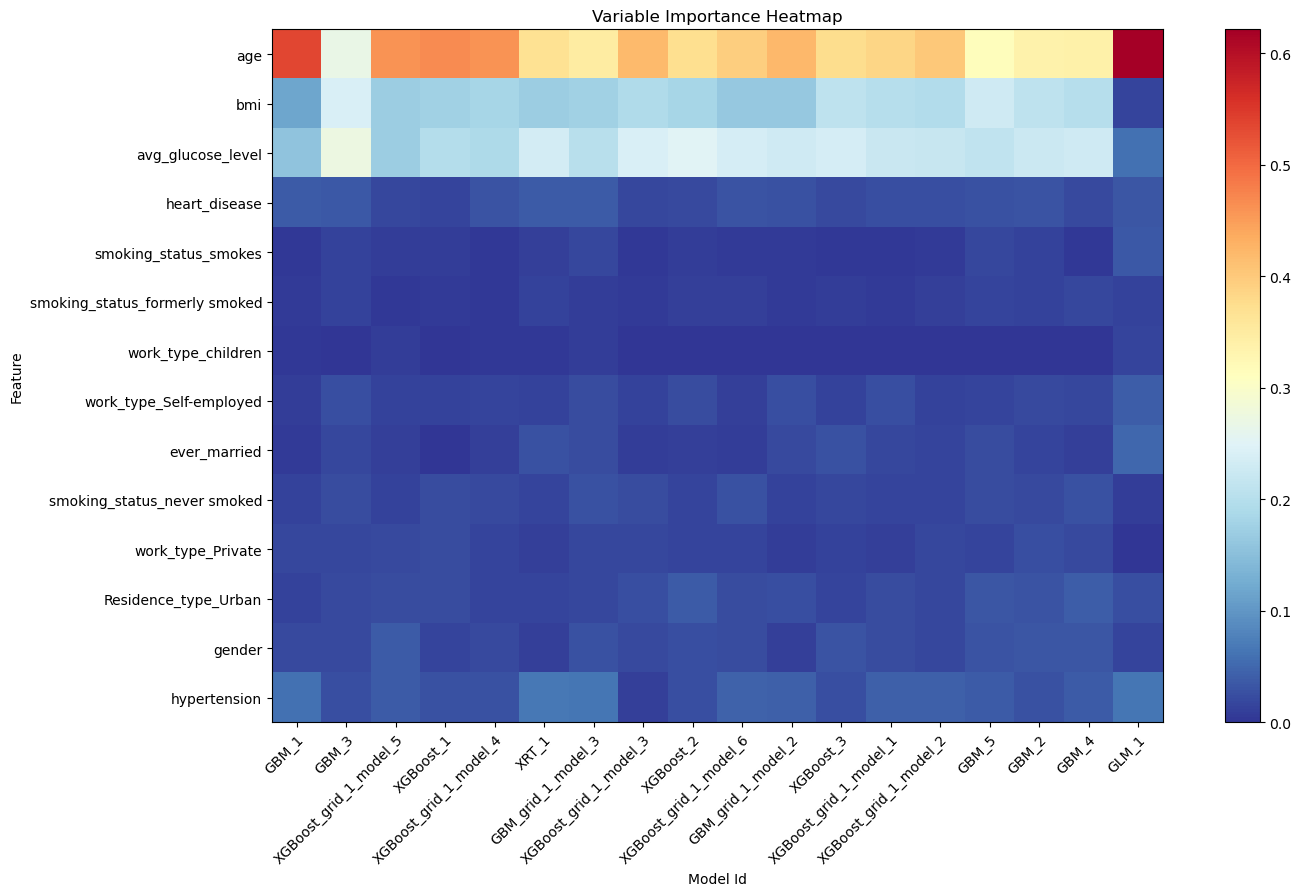

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

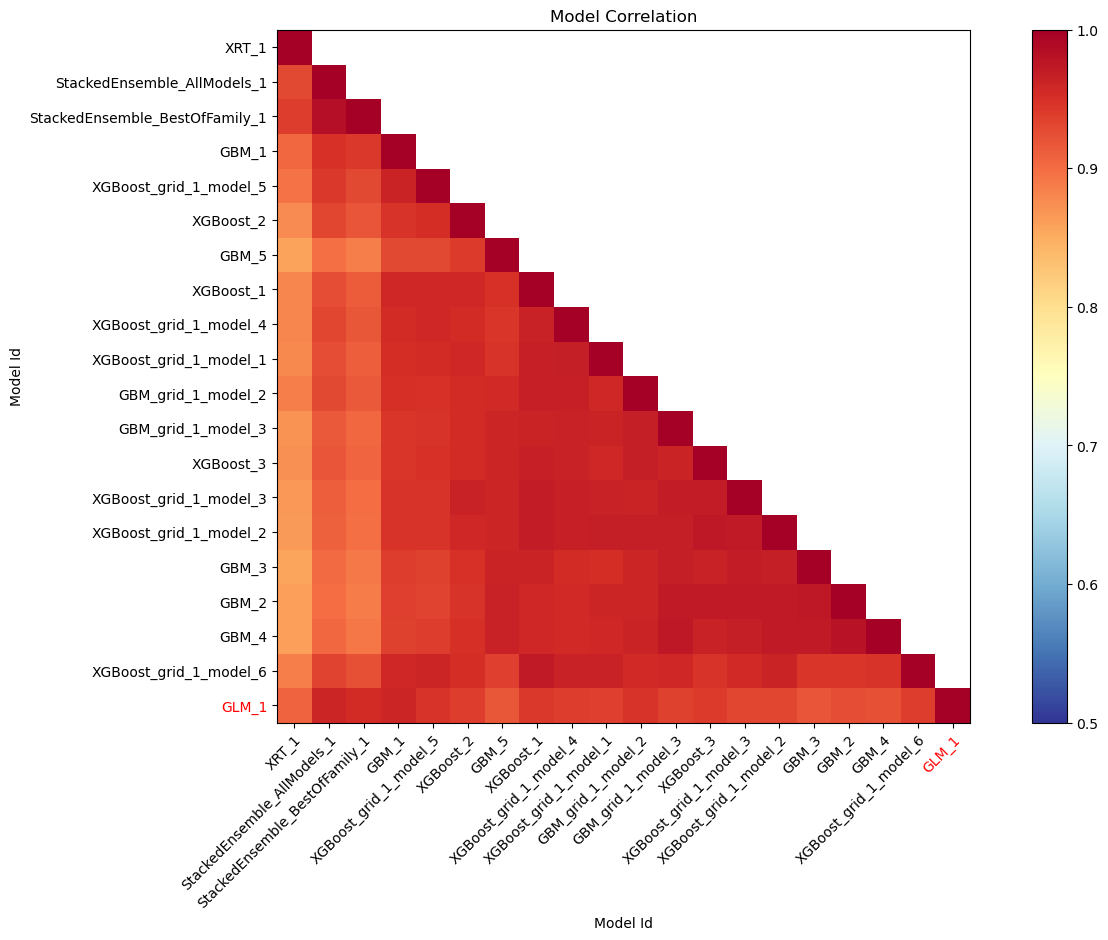

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

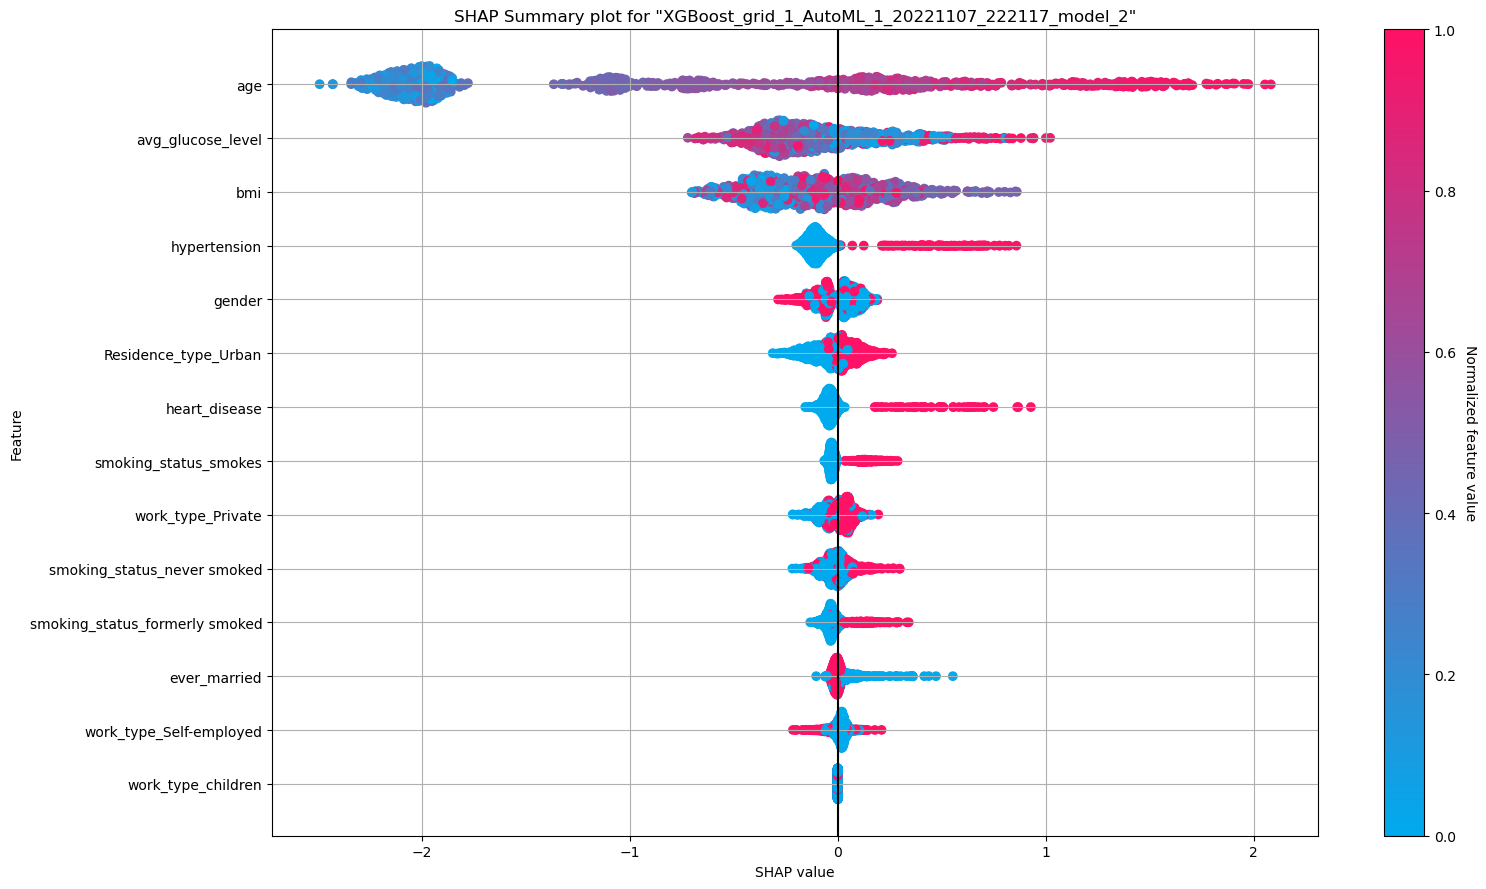

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

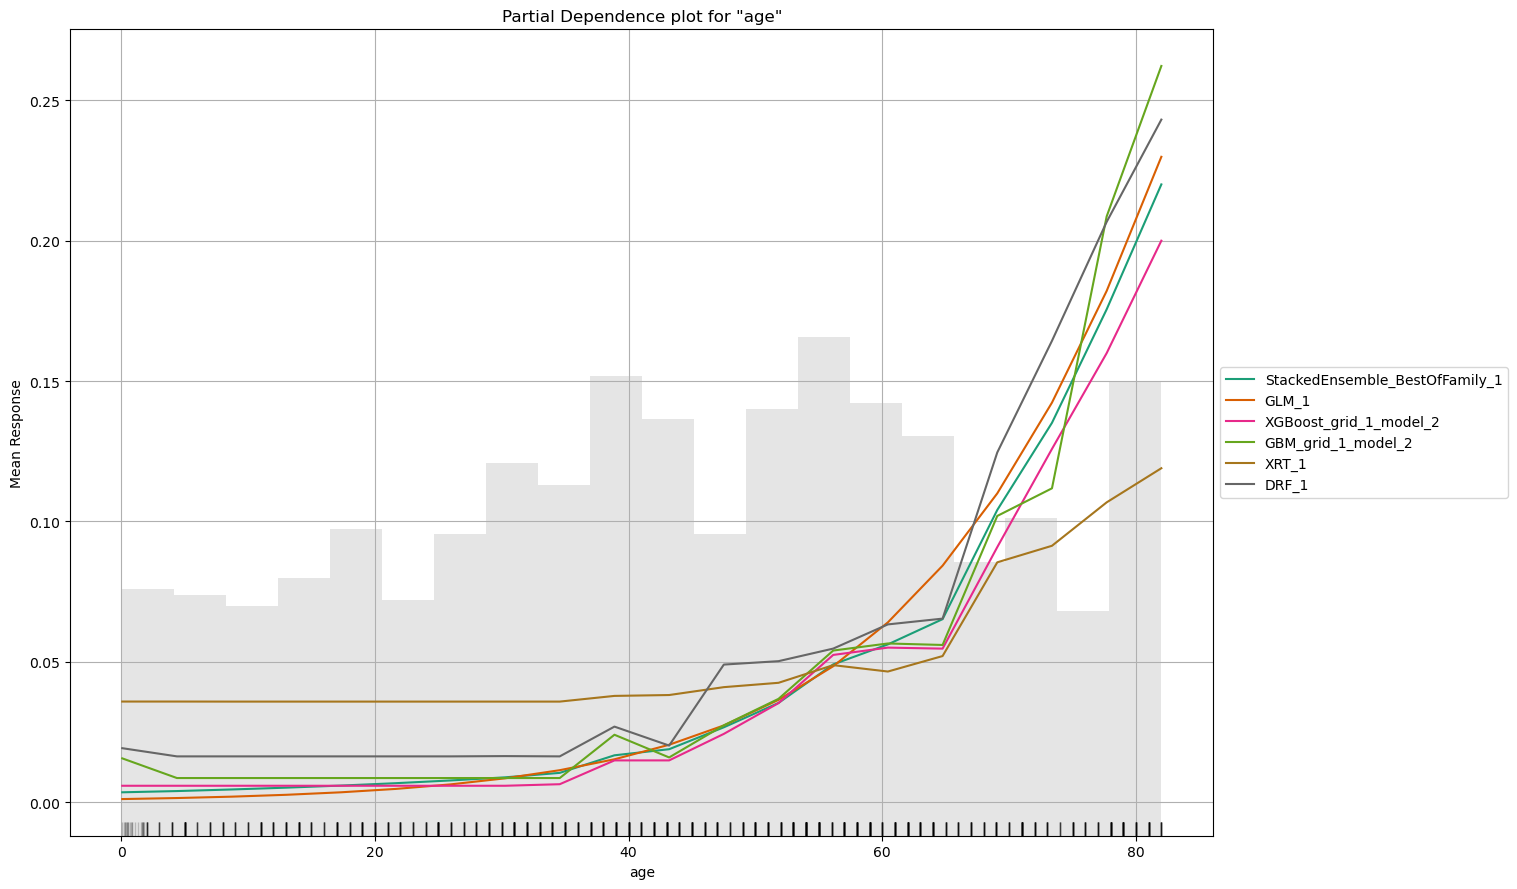

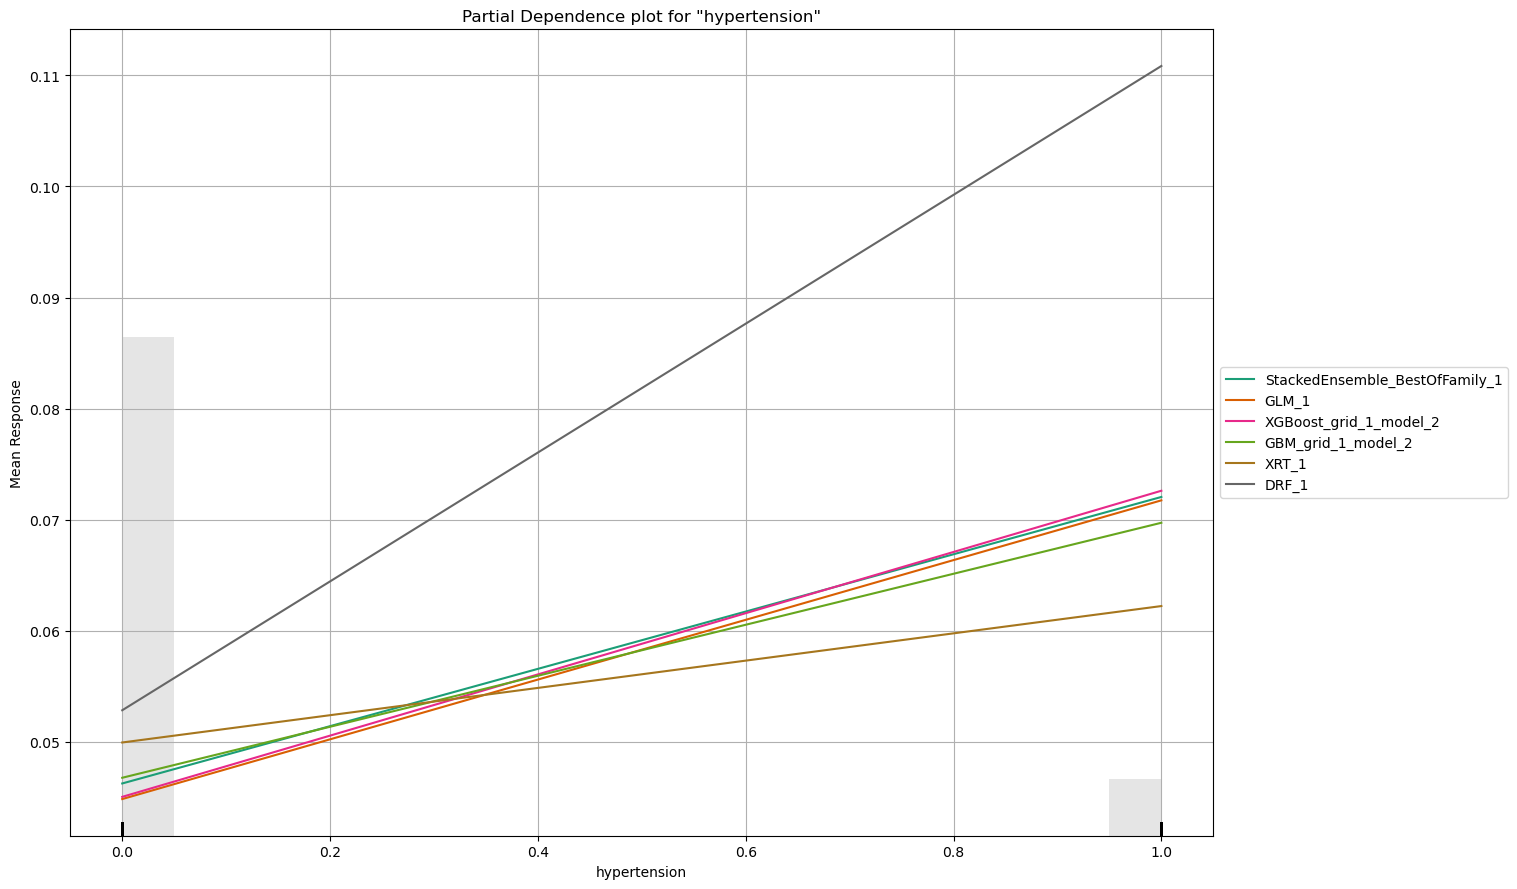

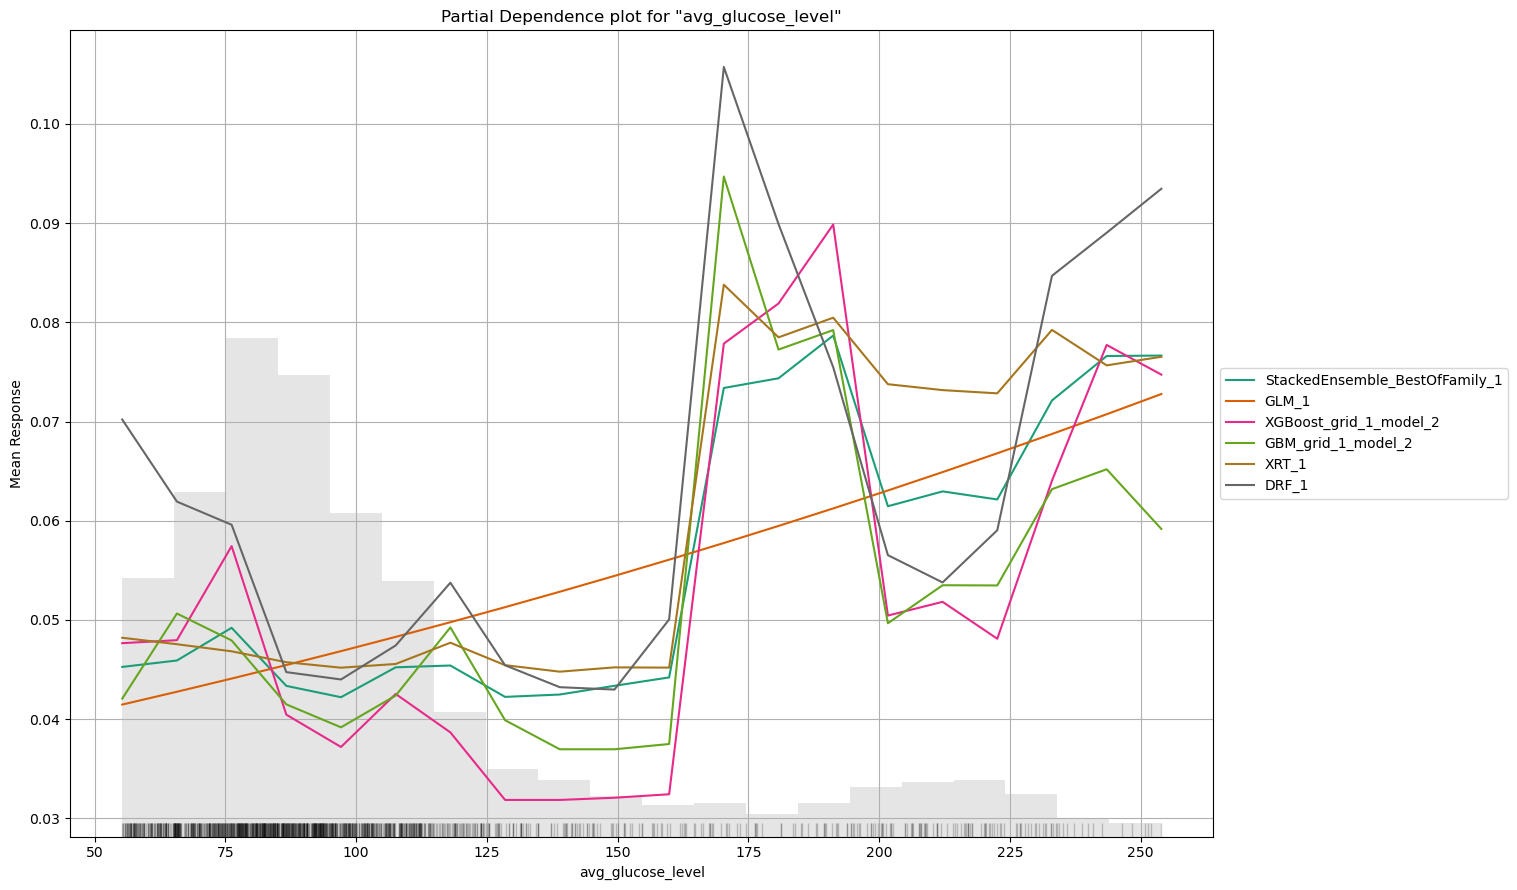

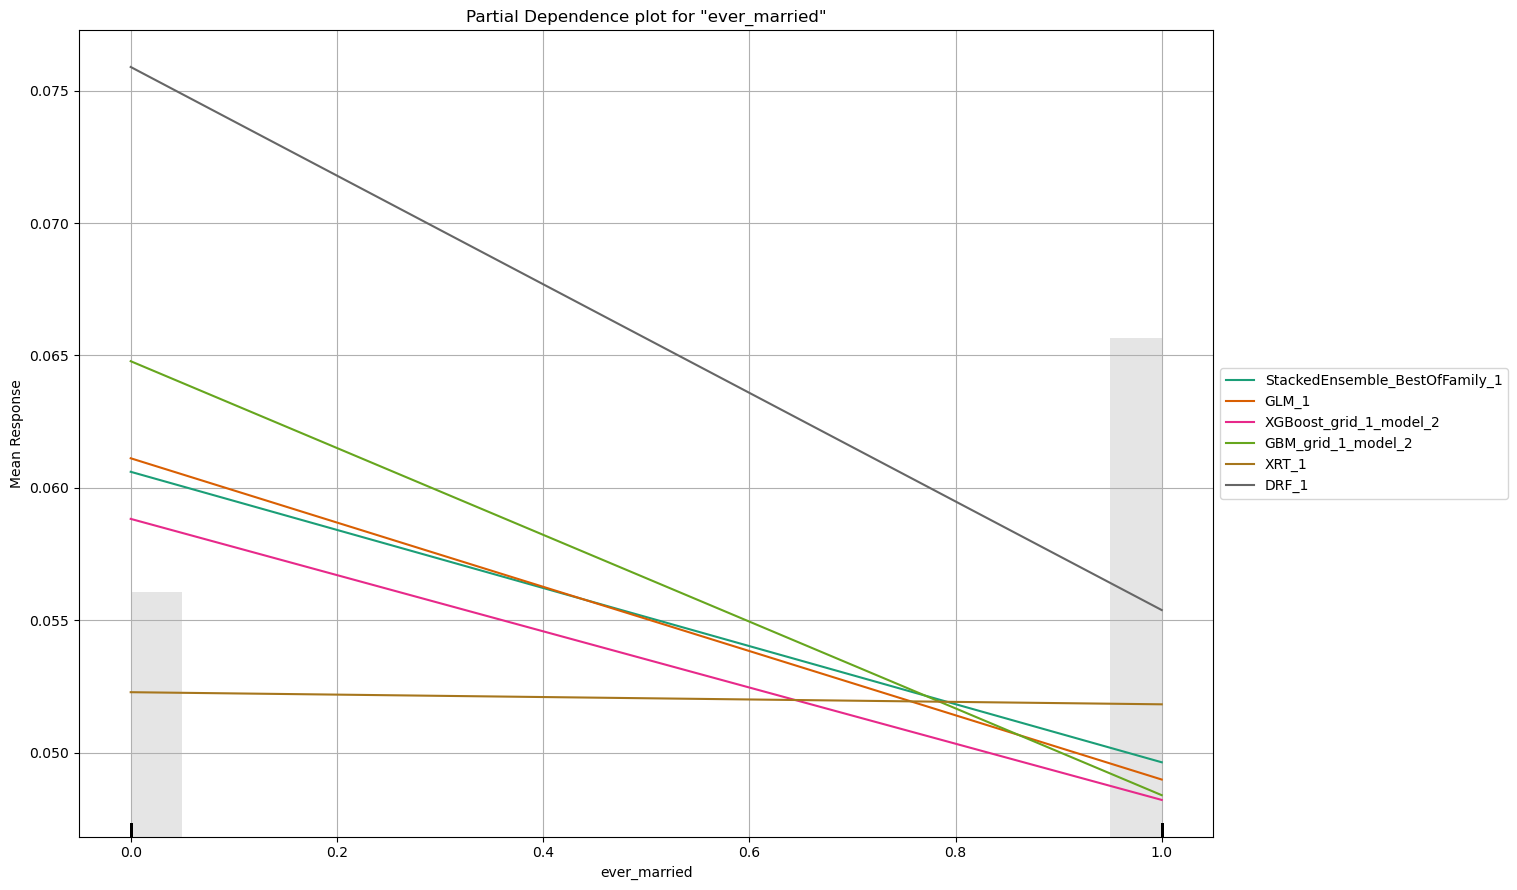

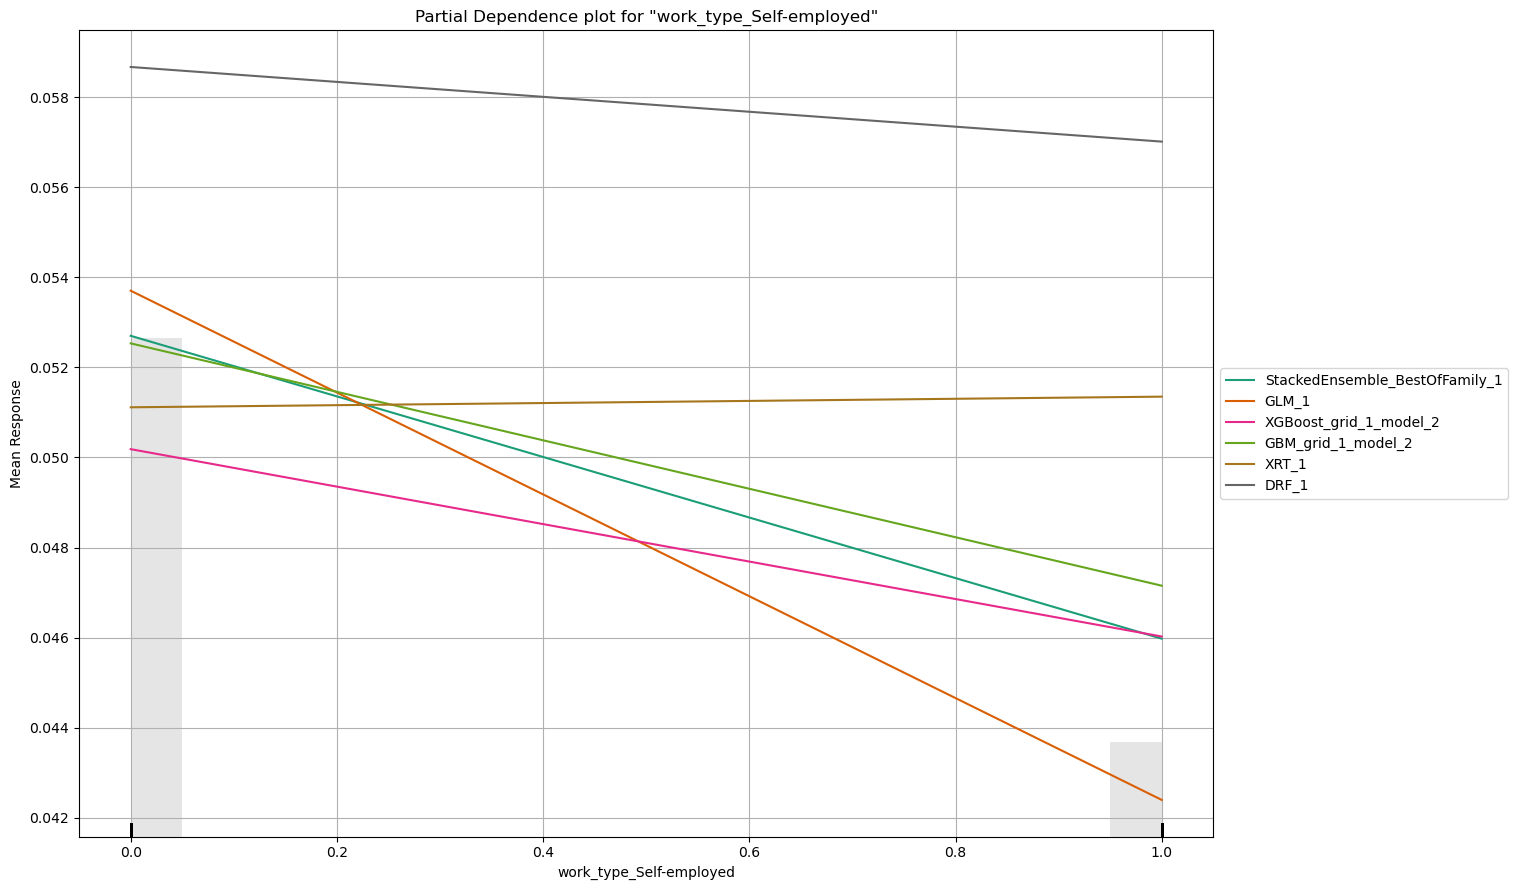

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_1_20221107_222117,0.833714,0.155849,0.141459,0.269578,0.20529,0.0421438,546,0.008856,GBM
XRT_1_AutoML_1_20221107_222117,0.827465,0.164375,0.142138,0.235834,0.204219,0.0417055,256,0.006645,DRF
StackedEnsemble_BestOfFamily_1_AutoML_1_20221107_222117,0.827189,0.157359,0.154506,0.323255,0.205433,0.0422027,2107,0.031288,StackedEnsemble
GLM_1_AutoML_1_20221107_222117,0.827182,0.15602,0.16162,0.294879,0.204064,0.0416422,267,0.03448,GLM
StackedEnsemble_AllModels_1_AutoML_1_20221107_222117,0.826831,0.157508,0.152614,0.332452,0.205399,0.0421886,1436,0.041044,StackedEnsemble
XGBoost_grid_1_AutoML_1_20221107_222117_model_1,0.825913,0.163816,0.138532,0.278514,0.212087,0.044981,232,0.004735,XGBoost
GBM_grid_1_AutoML_1_20221107_222117_model_2,0.824785,0.16119,0.151713,0.339097,0.207811,0.0431854,117,0.006929,GBM
XGBoost_grid_1_AutoML_1_20221107_222117_model_5,0.820216,0.160909,0.136315,0.304666,0.208692,0.0435523,265,0.00502,XGBoost
XGBoost_1_AutoML_1_20221107_222117,0.81891,0.163173,0.125604,0.317529,0.210306,0.0442286,333,0.005522,XGBoost
GBM_5_AutoML_1_20221107_222117,0.818649,0.170196,0.125739,0.283031,0.214943,0.0462006,124,0.006599,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20221107_222117

,0,1,Error,Rate
0,1075.0,100.0,0.0851,(100.0/1175.0)
1,32.0,25.0,0.5614,(32.0/57.0)
Total,1107.0,125.0,0.1071,(132.0/1232.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [19]:
aml.explain(test)

In [20]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20221107_222117,0.842435,0.161535,0.194998,0.260733,0.209354,0.0438293
GLM_1_AutoML_1_20221107_222117,0.837747,0.163373,0.182624,0.324969,0.21059,0.0443481
StackedEnsemble_AllModels_1_AutoML_1_20221107_222117,0.835724,0.164404,0.177781,0.309315,0.211029,0.0445333
XGBoost_grid_1_AutoML_1_20221107_222117_model_2,0.834604,0.164588,0.189149,0.309736,0.210801,0.0444372
GBM_grid_1_AutoML_1_20221107_222117_model_2,0.827627,0.168569,0.178096,0.304236,0.2132,0.0454543
XGBoost_grid_1_AutoML_1_20221107_222117_model_5,0.827568,0.166161,0.190979,0.29032,0.211149,0.0445838
GBM_1_AutoML_1_20221107_222117,0.826495,0.165198,0.198956,0.32843,0.210021,0.0441089
XGBoost_grid_1_AutoML_1_20221107_222117_model_6,0.826077,0.165936,0.191076,0.283996,0.210752,0.0444164
XGBoost_2_AutoML_1_20221107_222117,0.825091,0.169964,0.172801,0.306994,0.214046,0.0458156
XGBoost_grid_1_AutoML_1_20221107_222117_model_1,0.822173,0.169216,0.17507,0.27477,0.213073,0.0454002


Cause leader modle is StackedEnsemble model, we first choose second one to observe.

In [21]:
model2 = h2o.get_model(aml.leaderboard[1,'model_id'])

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20221107_222117

,0,1,Error,Rate
0,1018.0,157.0,0.1336,(157.0/1175.0)
1,26.0,31.0,0.4561,(26.0/57.0)
Total,1044.0,188.0,0.1485,(183.0/1232.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

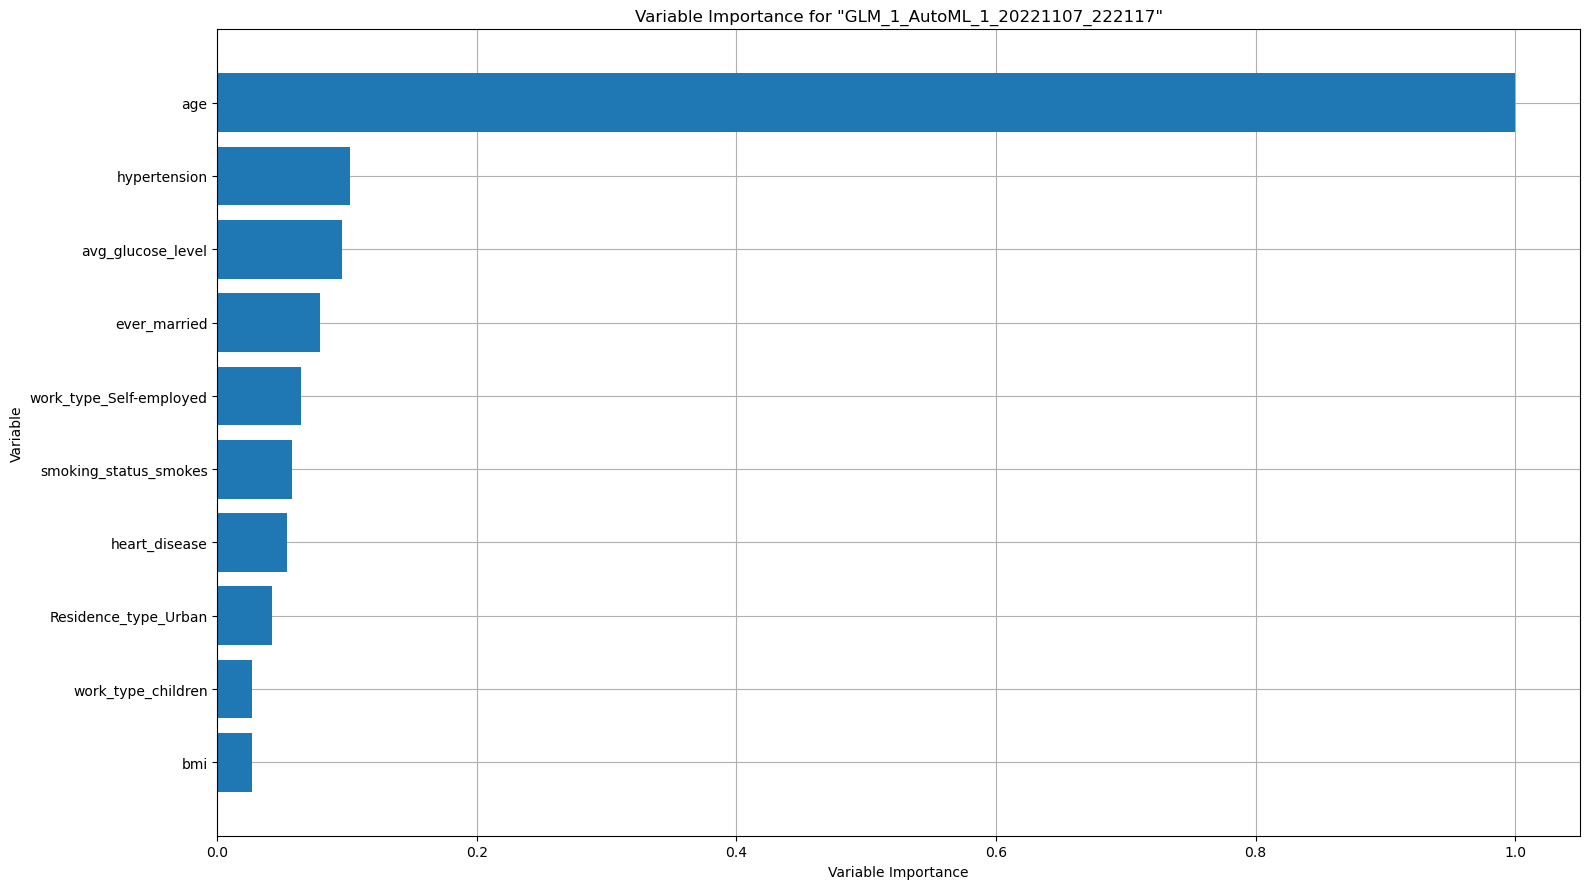

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

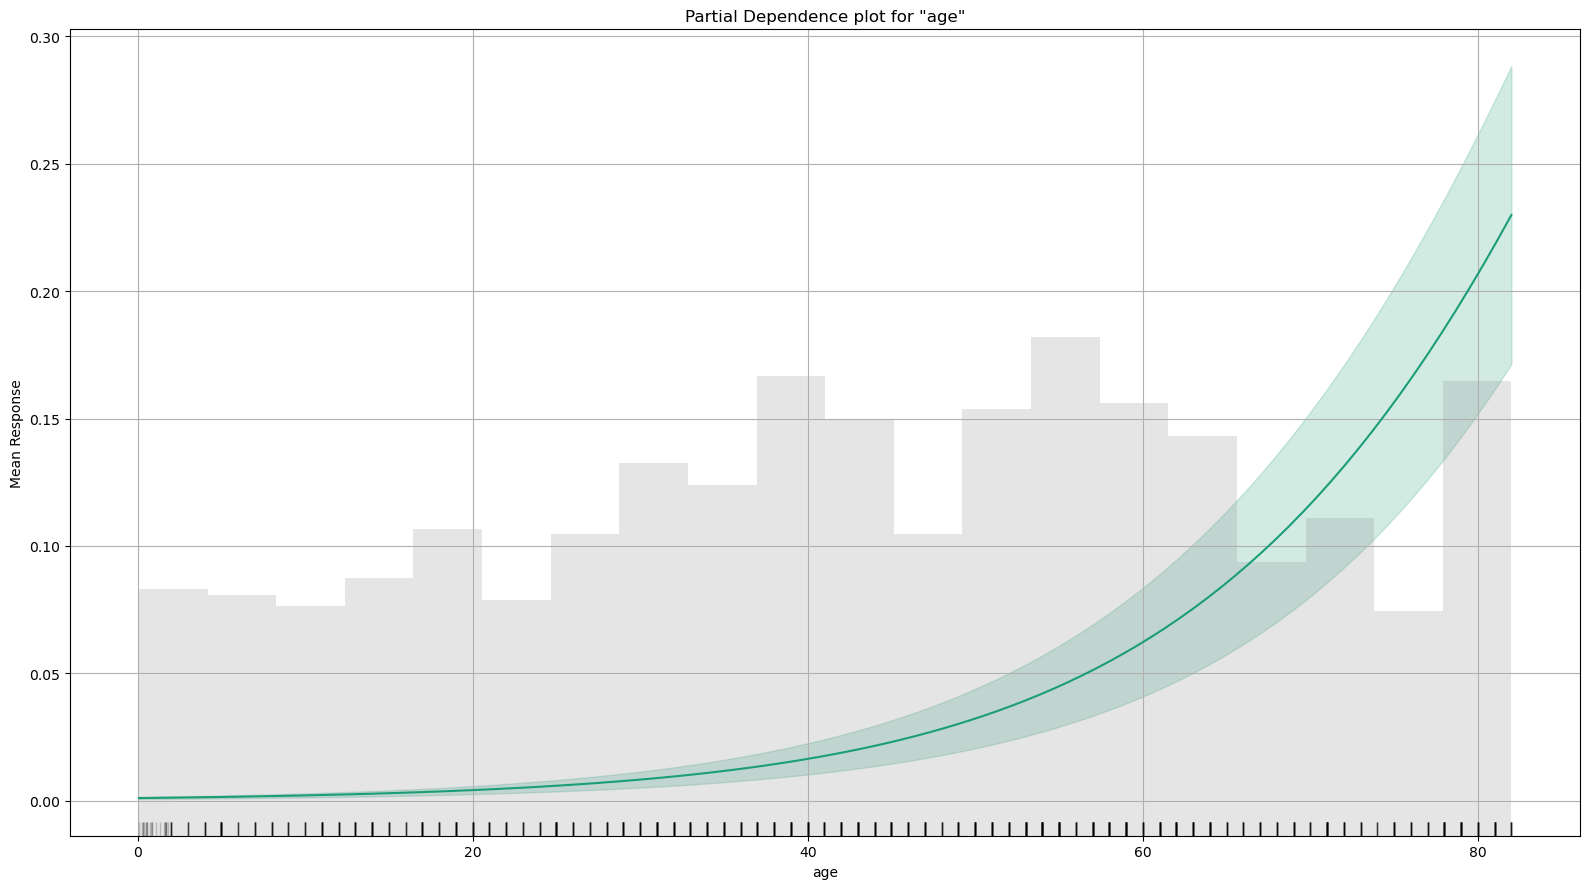

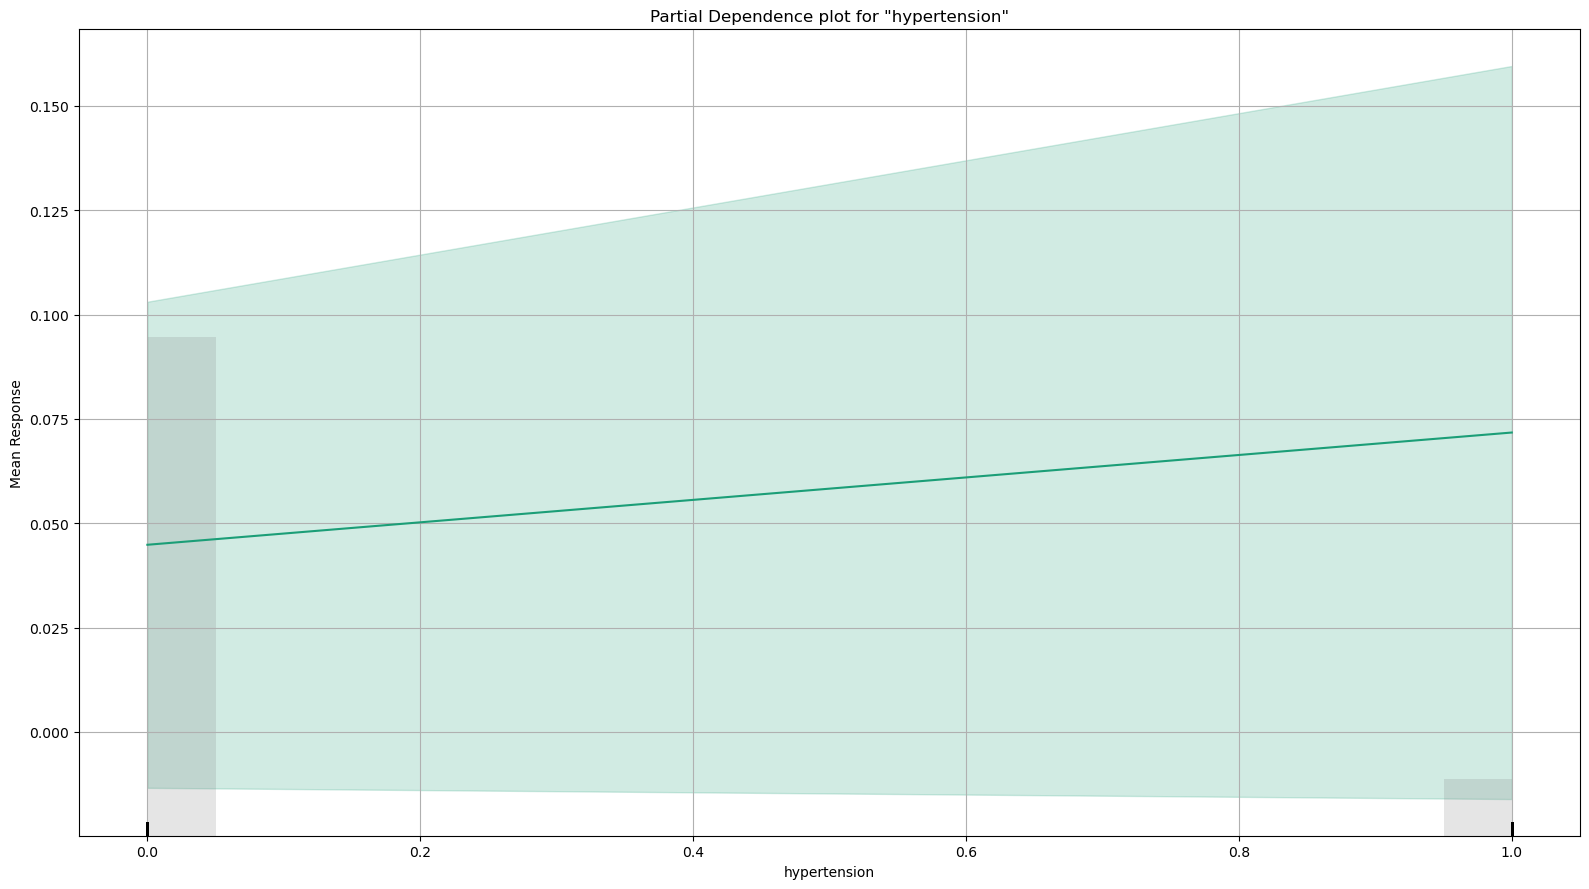

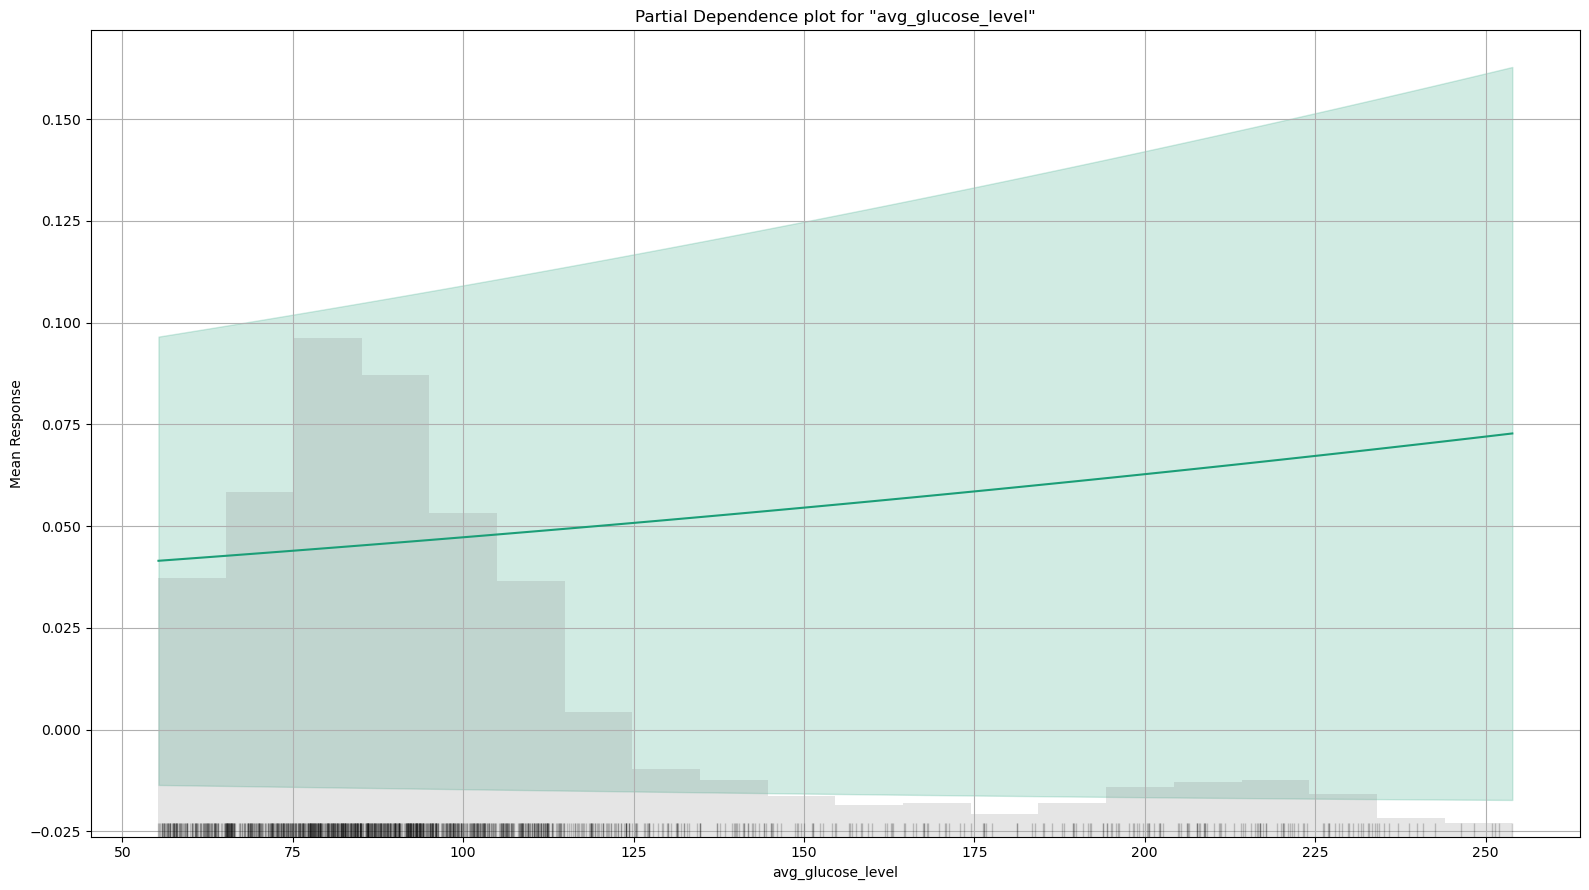

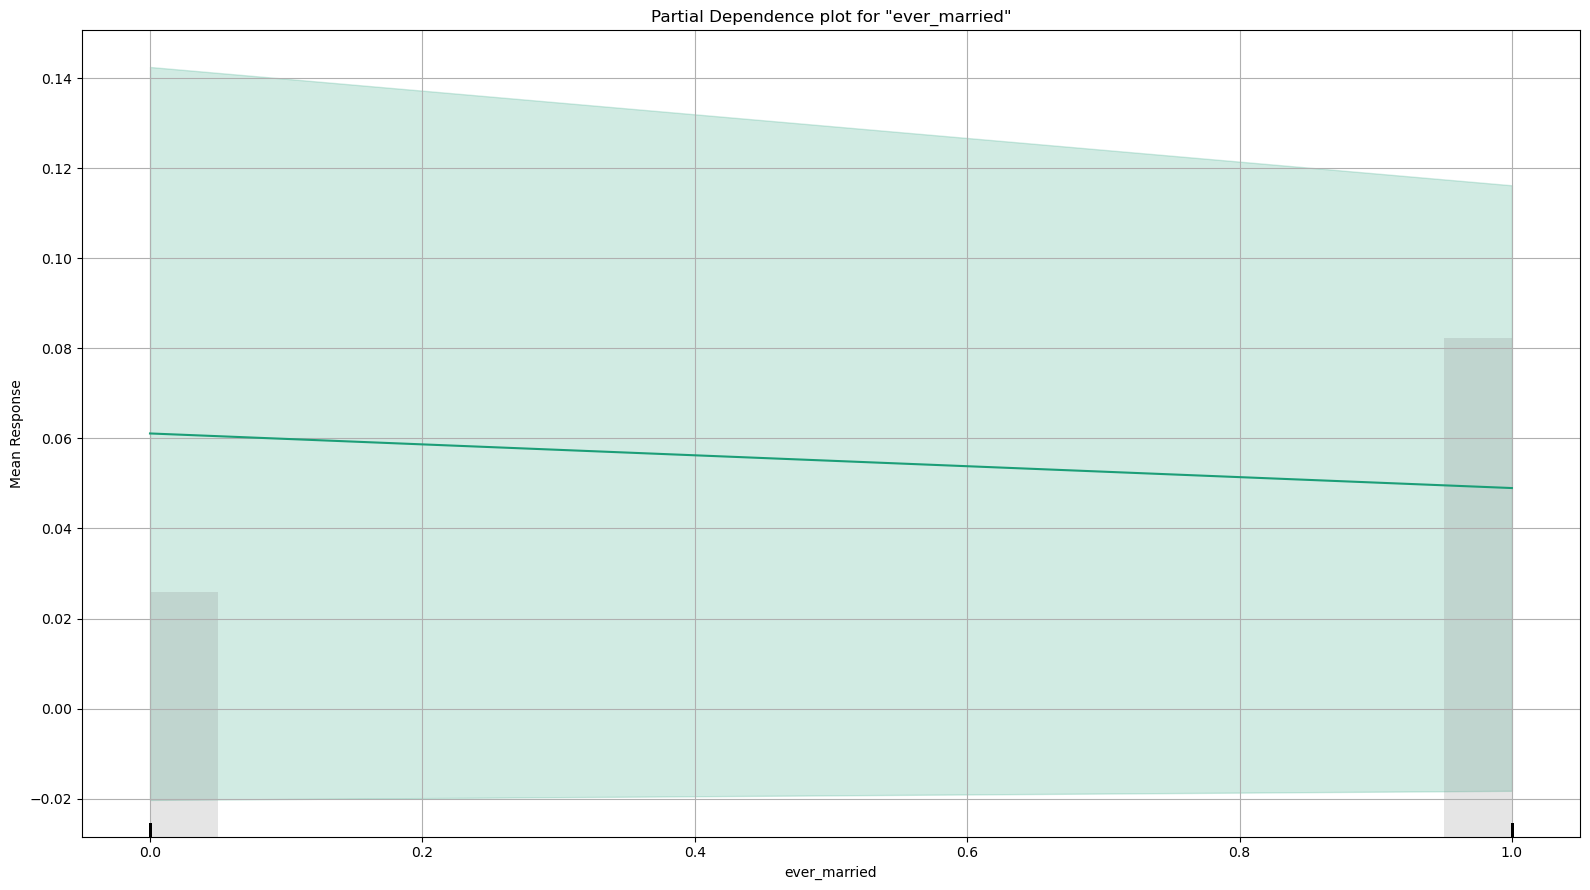

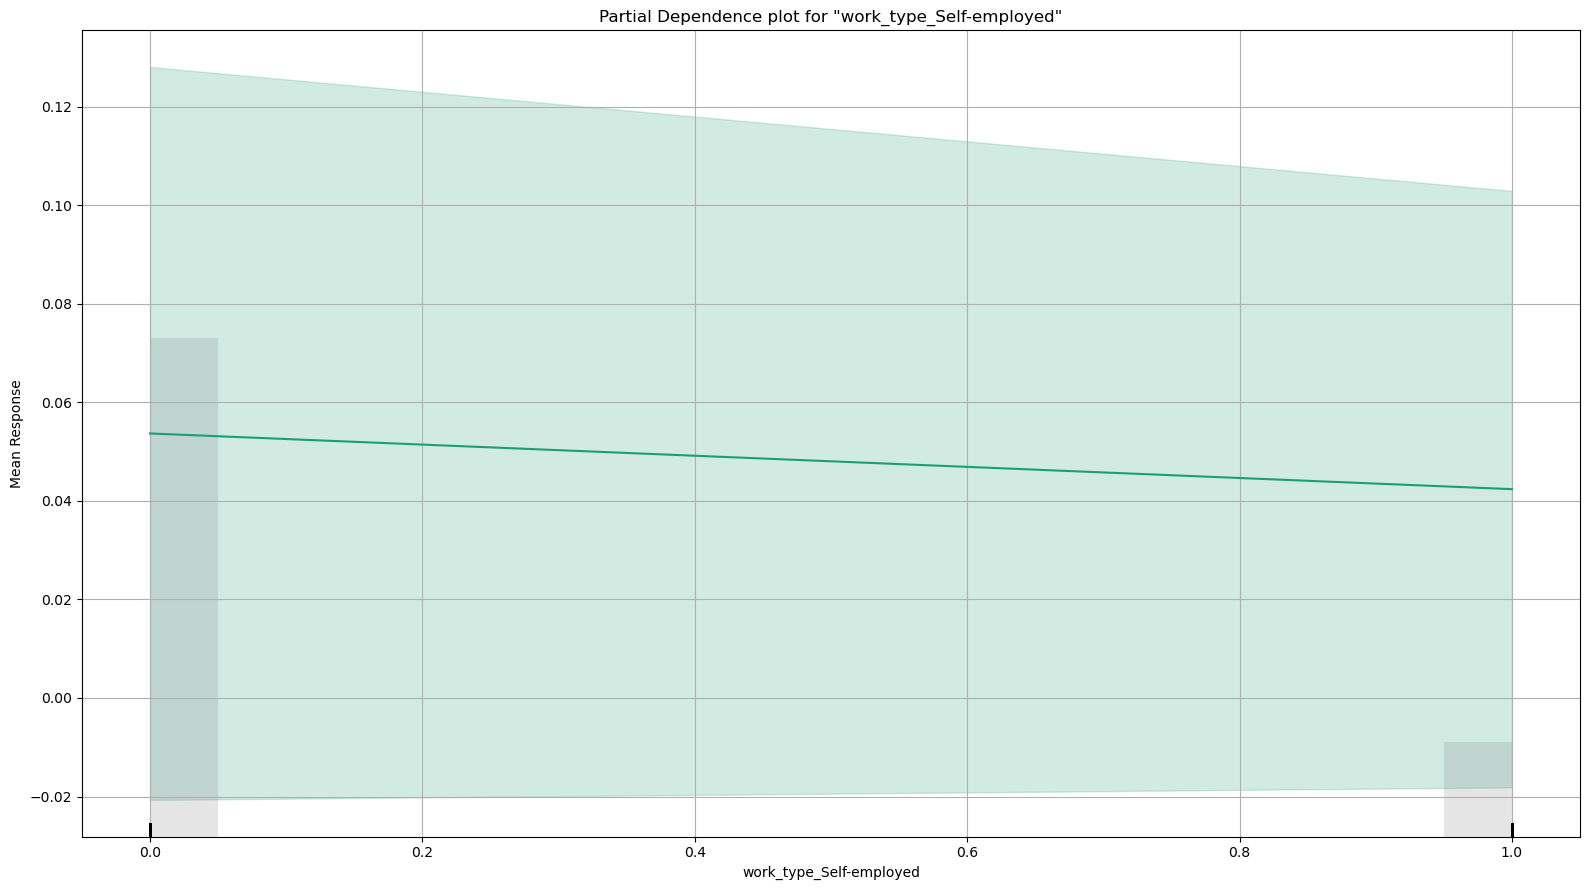

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20221107_222117

,0,1,Error,Rate
0,1018.0,157.0,0.1336,(157.0/1175.0)
1,26.0,31.0,0.4561,(26.0/57.0)
Total,1044.0,188.0,0.1485,(183.0/1232.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [22]:
model2.explain(test)

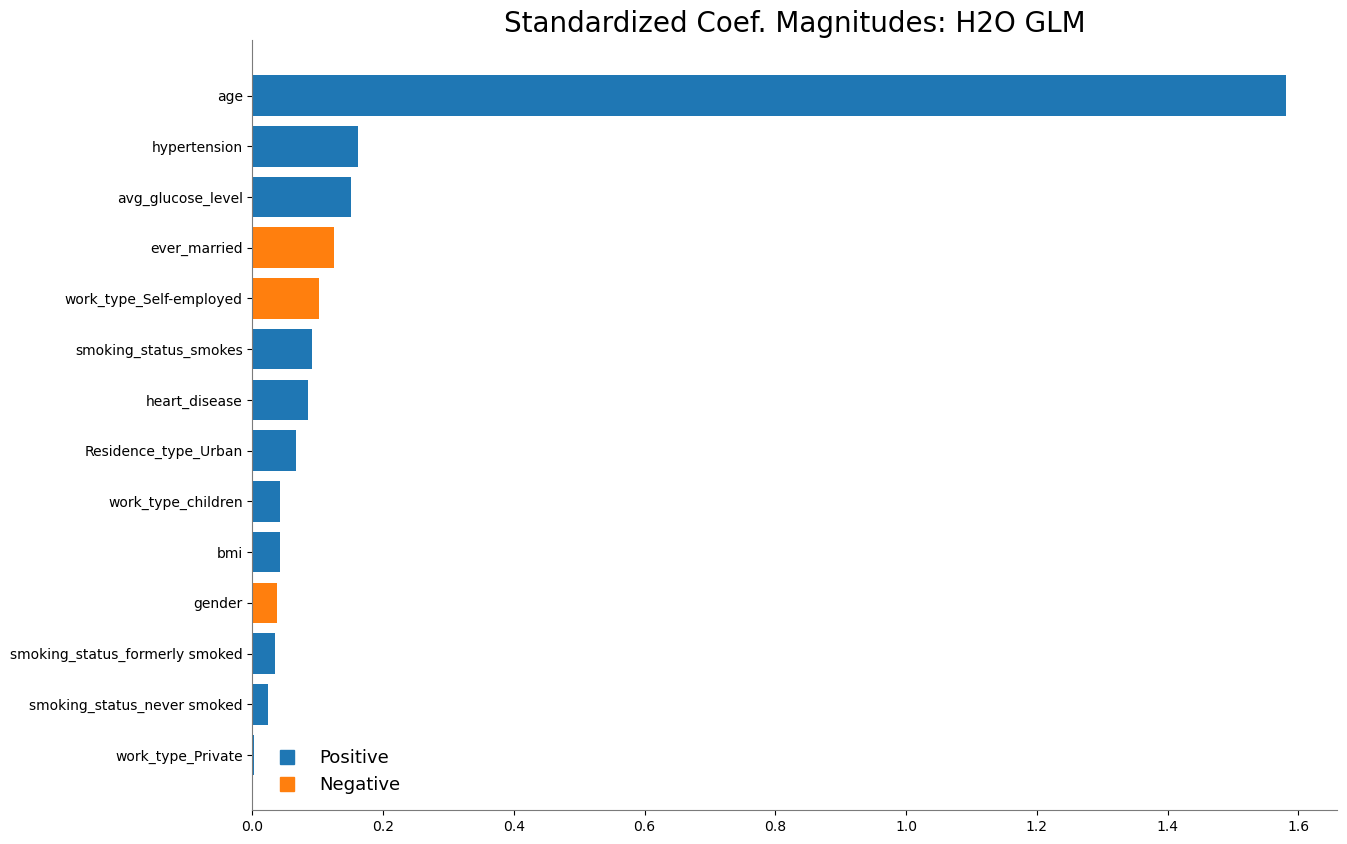

In [23]:
#represents the relationship of a specific feature to the response variable. 
model2.std_coef_plot()

According to the variable importance heatmap of aml above and the standard coefficient plot, here is a significant relation between 'age' and dependent variable 'stroke'. And Hypertension and avg_glucose_level are second and third important feature for reponse variable.

In [24]:
print(model2.r2())

0.1065230871315409


In [25]:
model2.model_performance(train = True)

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.04320079760174487
RMSE: 0.20784801563100108
LogLoss: 0.1583570918446208
AUC: 0.8503652266553655
AUCPR: 0.22153690337763168
Gini: 0.700730453310731
Null degrees of freedom: 3748
Residual degrees of freedom: 3734
Null deviance: 1509.3024608771314
Residual deviance: 1187.3614746509675
AIC: 1217.3614746509675

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15036624814390084
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      3248  310  0.0871   (310.0/3558.0)
1      100   91   0.5236   (100.0/191.0)
Total  3348  401  0.1094   (410.0/3749.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.150366     0.307432  144
max f2                       0.103787     0.442225  195
max f0point5                 0.234733     0.275708  67
max accuracy                 0.507041     0.94932   0
max precision                0.507041     1         0
max recall                   0.00120571   1         398
max specificity              0.507041     1         0
max absolute_mcc             0.120425     0.295717  177
max min_per_class_accuracy   0.0623064    0.770658  248
max mean_per_class_accuracy  0.0383903    0.77785   290
max tns                      0.507041     3558      0
max fns                      0.507041     190       0
max fps                      0.00104666   3558      399
max tps                      0.00120571   191       398
max tnr                      0.507041     1         0
max fnr                      0.507041     0.994764  0
max fpr                      0.00104666   1         399
max tpr                      0.00120571   1         398

Gains/Lift Table: Avg response rate:  5.09 %, avg score:  5.09 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010136                    0.31516            7.23147    7.23147            0.368421         0.371202    0.368421                    0.371202            0.0732984       0.0732984                  623.147   623.147            0.0665531
2        0.0200053                   0.266083           5.30494    6.28105            0.27027          0.289075    0.32                        0.330686            0.052356        0.125654                   430.494   528.105            0.111321
3        0.0301414                   0.238442           4.6488     5.73215            0.236842         0.251623    0.292035                    0.304099            0.0471204       0.172775                   364.88    473.215            0.15029
4        0.0400107                   0.221325           4.24395    5.36506            0.216216         0.229305    0.273333                    0.28565             0.0418848       0.21466                    324.395   436.506            0.184024
5        0.0501467                   0.203529           3.61573    5.01147            0.184211         0.211858    0.255319                    0.270734            0.0366492       0.251309                   261.573   401.147            0.211961
6        0.100027                    0.156545           3.7787     4.39673            0.192513         0.177351    0.224                       0.224167            0.188482        0.439791                   277.87    339.673            0.358003
7        0.150173                    0.120227           3.34098    4.04419            0.170213         0.136333    0.206039                  

In [26]:
model3 = h2o.get_model(aml.leaderboard[3,'model_id'])

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_1_20221107_222117_model_2

,0,1,Error,Rate
0,1067.0,108.0,0.0919,(108.0/1175.0)
1,37.0,20.0,0.6491,(37.0/57.0)
Total,1104.0,128.0,0.1177,(145.0/1232.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

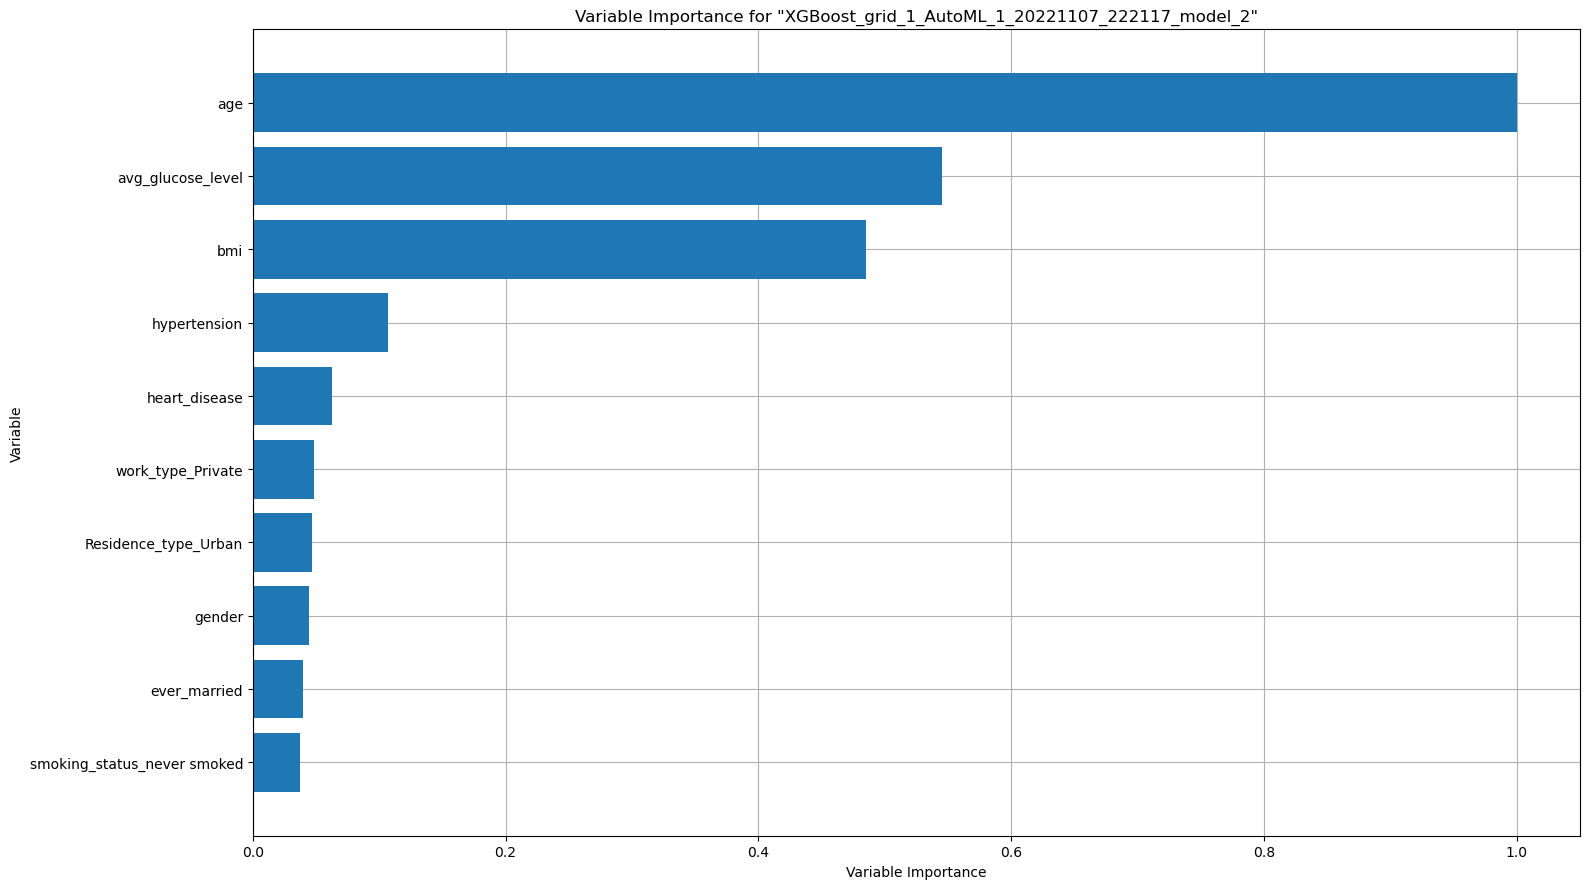

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

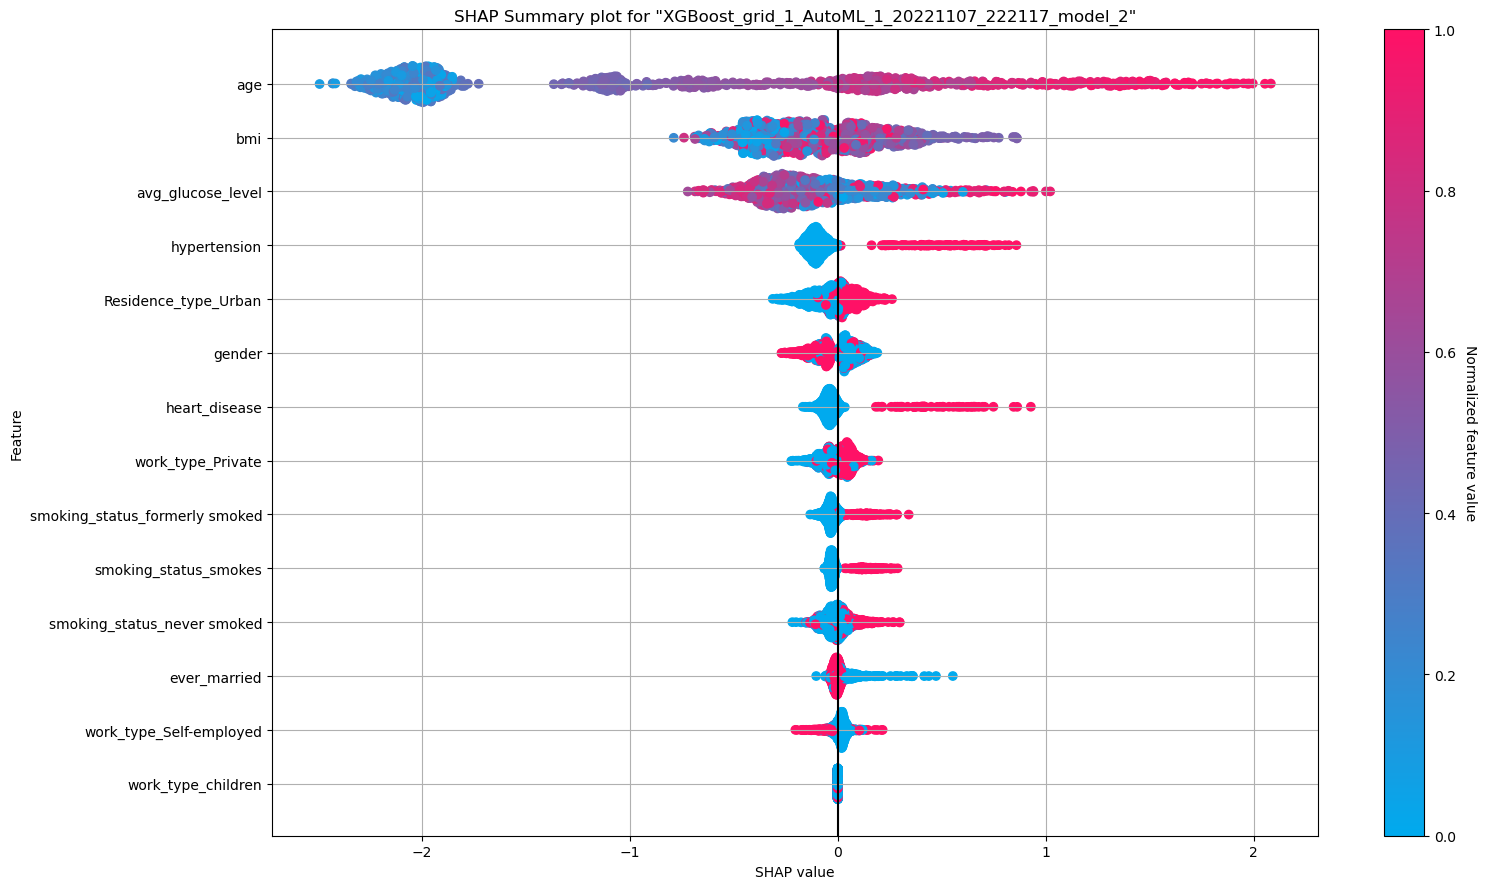

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

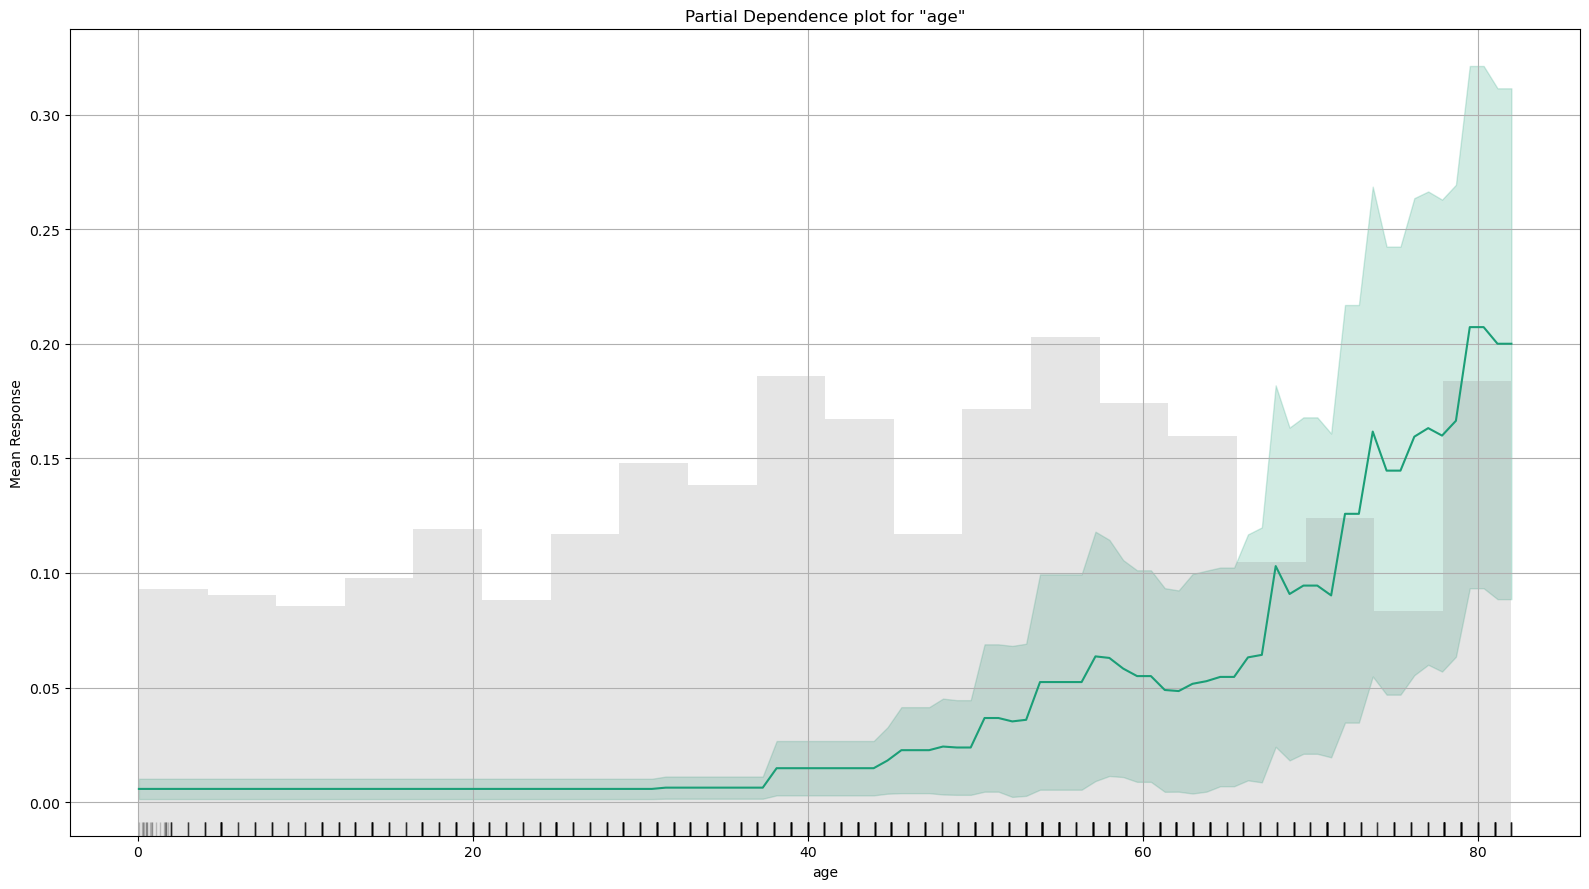

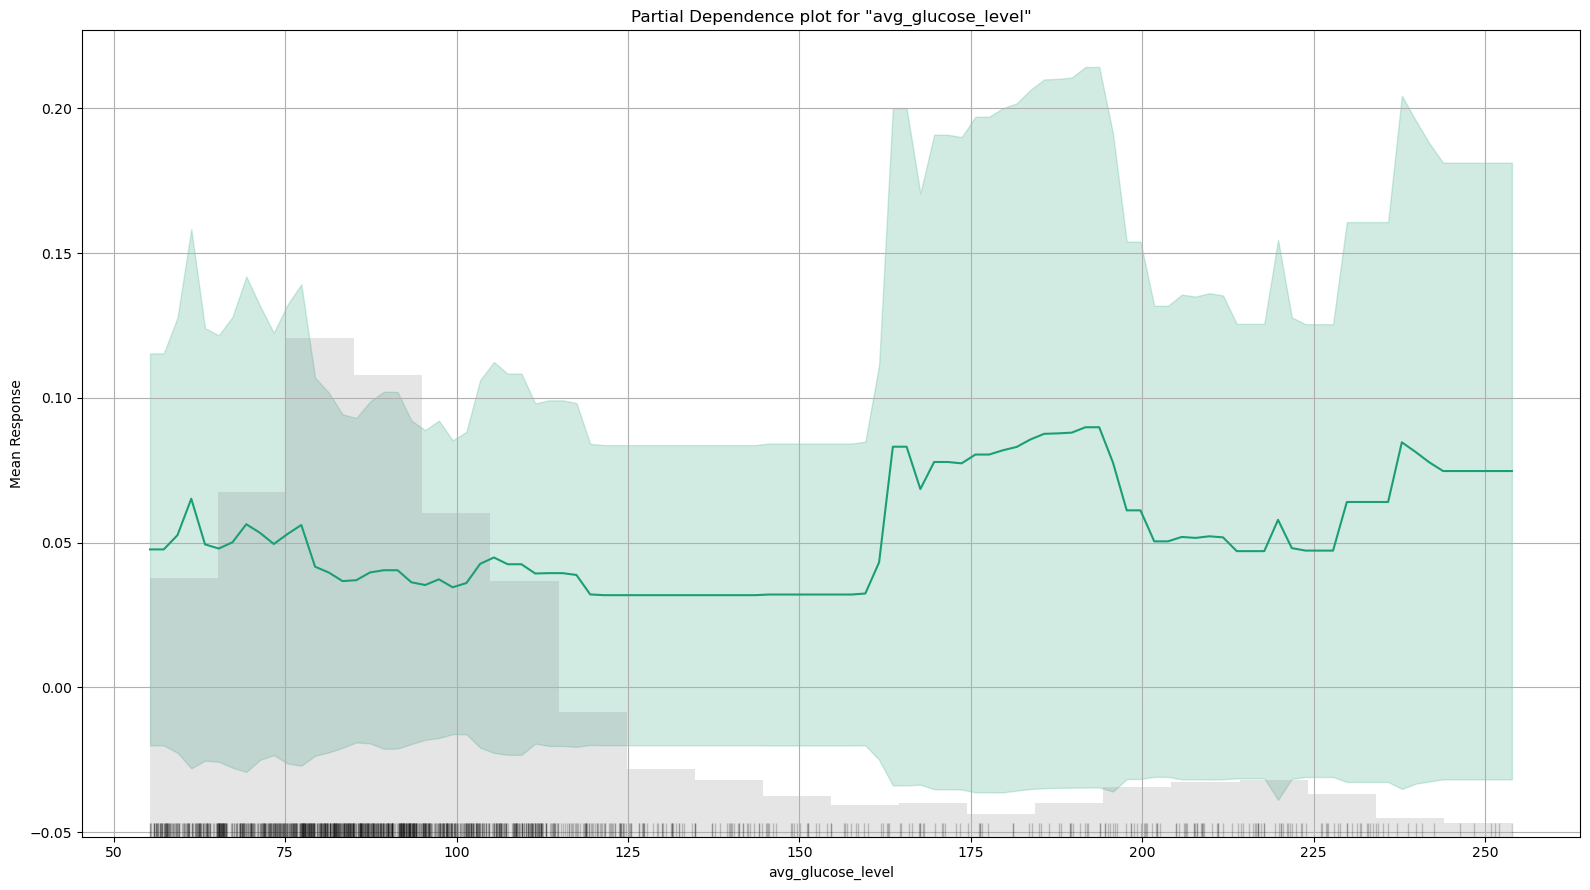

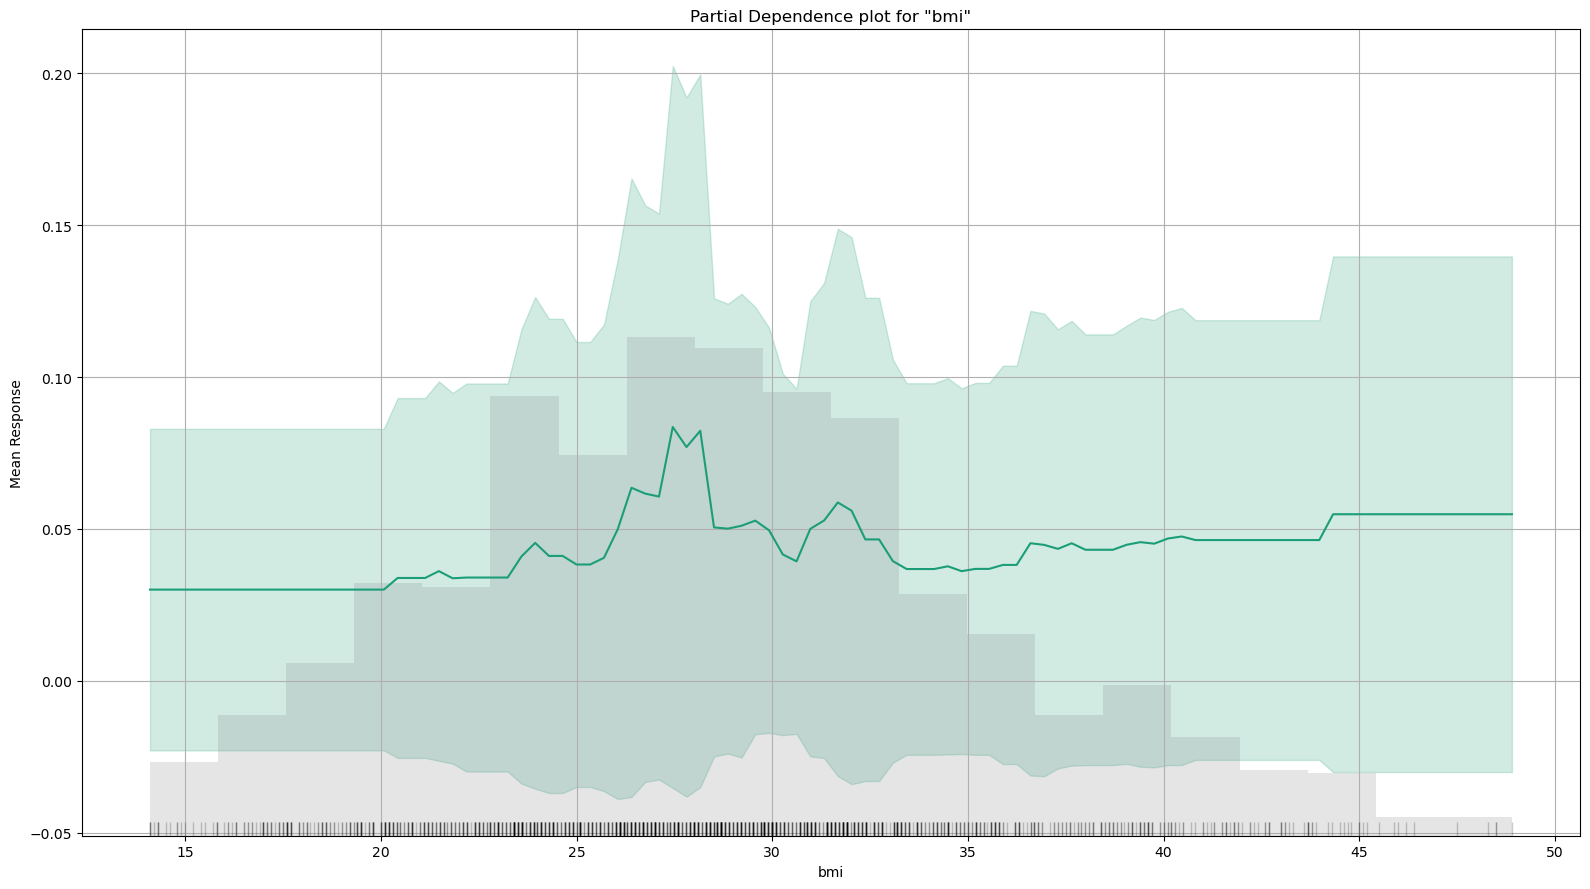

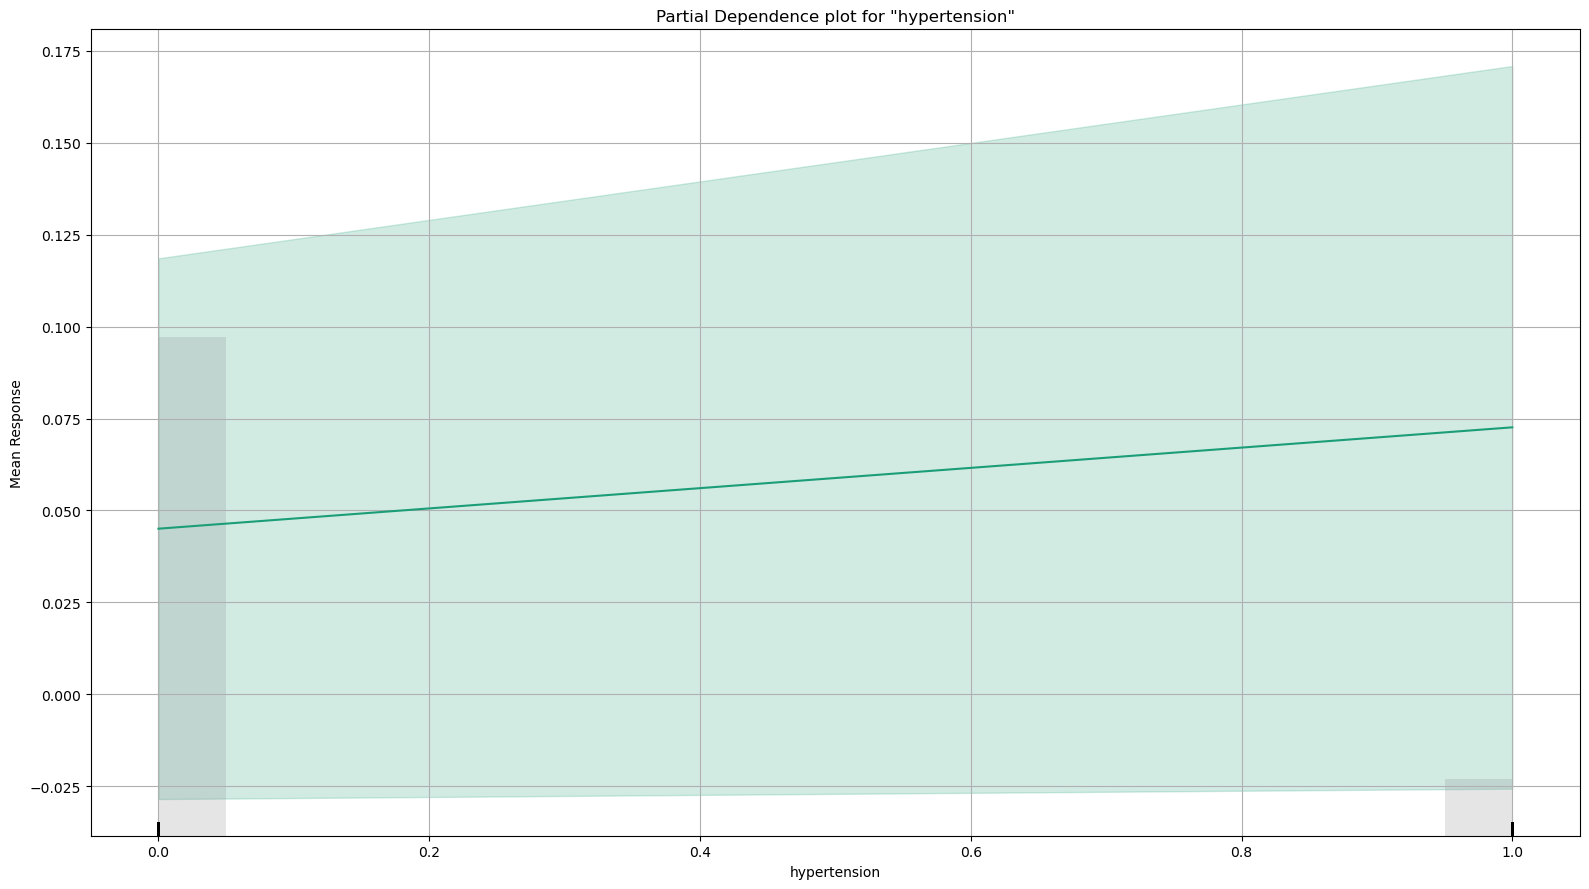

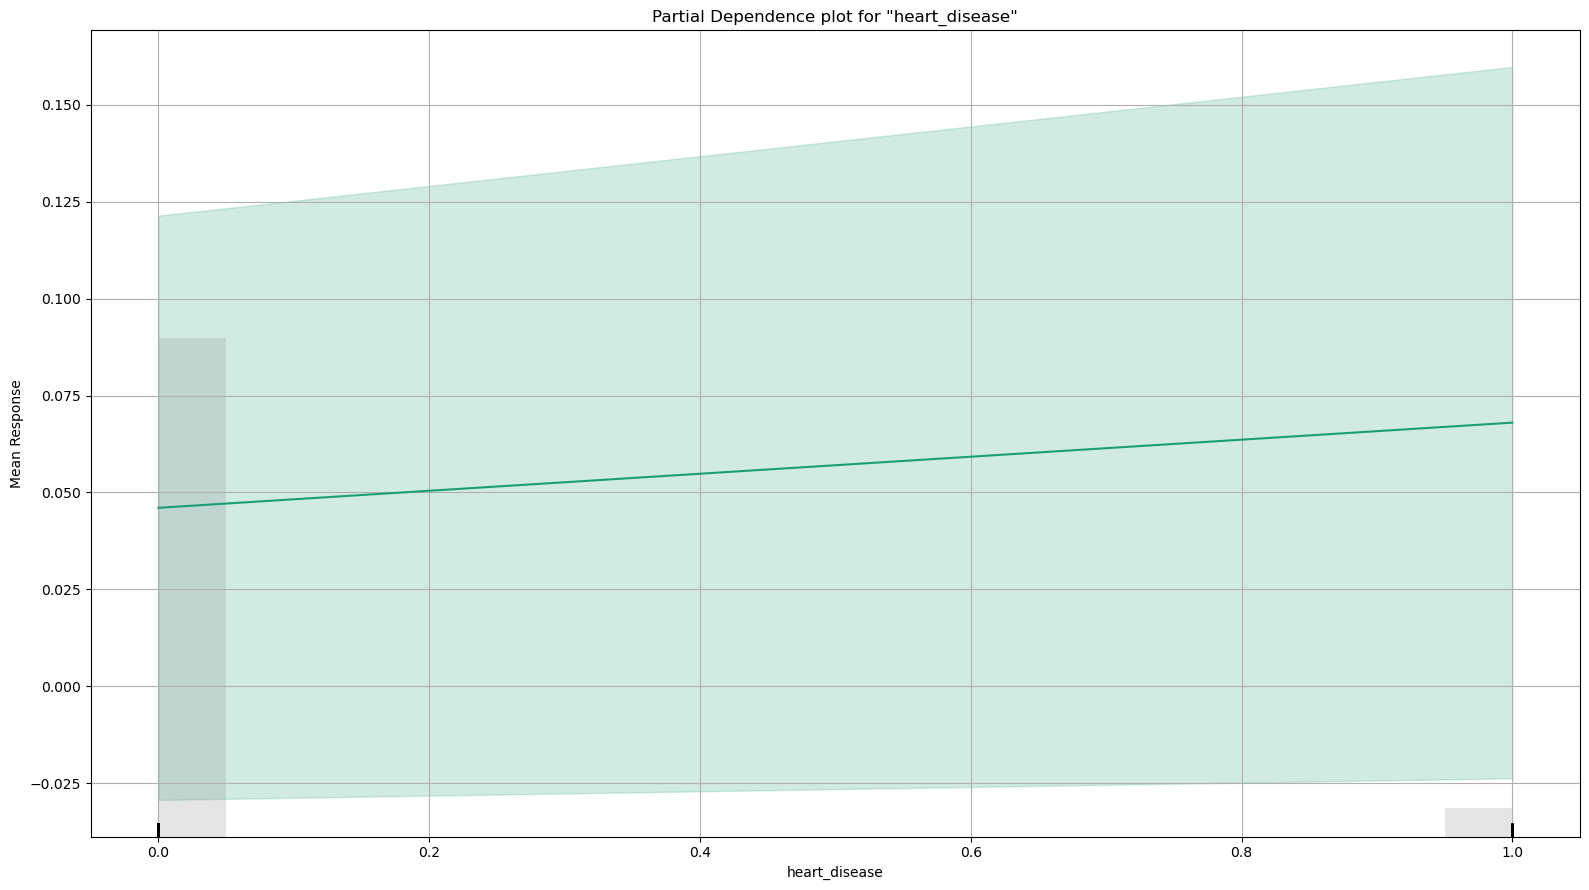

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_1_20221107_222117_model_2

,0,1,Error,Rate
0,1067.0,108.0,0.0919,(108.0/1175.0)
1,37.0,20.0,0.6491,(37.0/57.0)
Total,1104.0,128.0,0.1177,(145.0/1232.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [27]:
model3.explain(test)

According to the variable importance heatmap of aml above and the variable importance plot, here is a significant relation between 'age' and dependent variable 'stroke'. Comparing with (glm)model2, 'avg_glucose_level' now becom second important variable in this model 3, third significant relation between independent and dependent variable are 'bmi' and 'stroke'

In [28]:
model3.model_performance(train = True)

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.03152073952775439
RMSE: 0.17754081087951126
LogLoss: 0.11488587356202148
Mean Per-Class Error: 0.21304177003964225
AUC: 0.9435392258136667
AUCPR: 0.6476977944949364
Gini: 0.8870784516273333

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26140299439430237
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      3495  63   0.0177   (63.0/3558.0)
1      78    113  0.4084   (78.0/191.0)
Total  3573  176  0.0376   (141.0/3749.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.261403     0.615804  108
max f2                       0.199646     0.643902  143
max f0point5                 0.36532      0.685558  64
max accuracy                 0.291131     0.966124  93
max precision                0.660381     1         0
max recall                   0.00661062   1         379
max specificity              0.660381     1         0
max absolute_mcc             0.291131     0.605381  93
max min_per_class_accuracy   0.0953963    0.874346  233
max mean_per_class_accuracy  0.0903505    0.877344  239
max tns                      0.660381     3558      0
max fns                      0.660381     190       0
max fps                      0.00196759   3558      399
max tps                      0.00661062   191       379
max tnr                      0.660381     1         0
max fnr                      0.660381     0.994764  0
max fpr                      0.00196759   1         399
max tpr                      0.00661062   1         379

Gains/Lift Table: Avg response rate:  5.09 %, avg score:  5.24 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010136                    0.477247           18.0787    18.0787            0.921053         0.548786    0.921053                    0.548786            0.183246        0.183246                   1707.87   1707.87            0.182403
2        0.0200053                   0.38551            14.8538    16.4877            0.756757         0.428357    0.84                        0.489375            0.146597        0.329843                   1385.38   1548.77            0.32647
3        0.0301414                   0.323661           11.8803    14.9383            0.605263         0.355239    0.761062                    0.444267            0.120419        0.450262                   1088.03   1393.83            0.442673
4        0.0400107                   0.281593           9.54889    13.6089            0.486486         0.299842    0.693333                    0.408642            0.0942408       0.544503                   854.889   1260.89            0.531574
5        0.0501467                   0.245614           6.1984     12.1111            0.315789         0.264688    0.617021                    0.379545            0.0628272       0.60733                    519.84    1111.11            0.587094
6        0.100027                    0.145696           2.83403    7.48491            0.144385         0.189463    0.381333                    0.284758            0.141361        0.748691                   183.403   648.491            0.683486
7        0.150173                    0.10117            2.08811    5.68279            0.106383         0.121938    0.28952                     0.230388            0.104712        0.853403                   108.811   468.279            0.74098
8        0.200053

### GLM with Regularization v.s GLM without Regularization
To get the best possible model, GLM need to find the optimal values of the regularization parameters α and λ. When performing regularization, penalties are introduced to the model buidling process to avoid overfitting, to reduce variance of the prediction error, and to handle correlated predictors.
In h2o the lambda is avaliable in GLM, so here we using GLM to observe regularization's effect.


In [29]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

noRegular_glm = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 0,alpha=0)
withRegular_glm = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 1e-10,alpha=0)     
noRegular_glm.train(x=x, y=target, training_frame=train)
withRegular_glm.train(x=x, y=target, training_frame=train)
print("mse: ",noRegular_glm.mse(train = True))
print('logloss: ',noRegular_glm.logloss(train = True))
print('auc: ',noRegular_glm.auc(train = True))
print('aucpr: ',noRegular_glm.aucpr(train = True))

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
mse:  0.04319494429629485
logloss:  0.15823330487345721
auc:  0.8502681075608687
aucpr:  0.22129823114320352


In [30]:
print('mse: ',withRegular_glm.mse(train = True))
print('logloss: ',withRegular_glm.logloss(train = True))
print('auc: ',withRegular_glm.auc(train = True))
print('aucpr: ',withRegular_glm.aucpr(train = True))

mse:  0.043194953156477534
logloss:  0.15823333898936193
auc:  0.8502717863144481
aucpr:  0.22129106562002074


Compare the auc of tained eneralized Linear Model with and without Regularization, Regularization does help in this dataset when lambda set to a appropriate value(here lambda=0.0000001, alpha=0, using Ridge Regression penalized model).

#### Hyperparameter tuning

In [31]:
from h2o.grid.grid_search import H2OGridSearch

In [33]:
hyper_params = {
    'alpha':[0,0.5,1],
    'lambda':[0,0.001,0.05,0.01,0.1],
    'missing_values_handling': ["MeanImputation", "Skip"],
    'seed': [1,10,99],
    'theta': [1e-10,1e-6,1e-3]}

grid = H2OGridSearch(model=H2OGeneralizedLinearEstimator, grid_id='glm_grid1',
                          hyper_params=hyper_params)
#Train grid search
grid.train(x=x, 
           y=target,
           training_frame=train)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,alpha,lambda,missing_values_handling,seed,theta,model_ids,logloss
,0.0,0.0,MeanImputation,1.0,1e-10,glm_grid1_model_1,0.1582333
,0.0,0.0,Skip,99.0,1e-10,glm_grid1_model_106,0.1582333
,0.5,0.0,Skip,99.0,1e-10,glm_grid1_model_107,0.1582333
,1.0,0.0,Skip,99.0,1e-10,glm_grid1_model_108,0.1582333
,0.0,0.0,MeanImputation,1.0,1e-06,glm_grid1_model_136,0.1582333
,0.5,0.0,MeanImputation,1.0,1e-06,glm_grid1_model_137,0.1582333
,1.0,0.0,MeanImputation,1.0,1e-06,glm_grid1_model_138,0.1582333
,0.0,0.0,Skip,1.0,1e-06,glm_grid1_model_151,0.1582333
,0.5,0.0,Skip,1.0,1e-06,glm_grid1_model_152,0.1582333
,1.0,0.0,Skip,1.0,1e-06,glm_grid1_model_153,0.1582333


In [34]:
glm_gridperf1 = grid.get_grid(sort_by='auc', decreasing=True)
glm_gridperf1

,alpha,lambda,missing_values_handling,seed,theta,model_ids,auc
,0.0,0.001,Skip,99.0,1e-10,glm_grid1_model_109,0.8503218
,0.0,0.001,MeanImputation,1.0,1e-06,glm_grid1_model_139,0.8503218
,0.0,0.001,Skip,1.0,1e-06,glm_grid1_model_154,0.8503218
,0.0,0.001,MeanImputation,10.0,1e-06,glm_grid1_model_184,0.8503218
,0.0,0.001,Skip,1.0,1e-10,glm_grid1_model_19,0.8503218
,0.0,0.001,Skip,10.0,1e-06,glm_grid1_model_199,0.8503218
,0.0,0.001,MeanImputation,99.0,1e-06,glm_grid1_model_229,0.8503218
,0.0,0.001,Skip,99.0,1e-06,glm_grid1_model_244,0.8503218
,0.0,0.001,MeanImputation,1.0,0.001,glm_grid1_model_274,0.8503218
,0.0,0.001,Skip,1.0,0.001,glm_grid1_model_289,0.8503218


Using the grid search of h2o and tuning hyperparameter, we find a best model with hyperparameter(alpha=0.0,	lambda=0.001, missing_values_handling=Skip, seed=99.0, theta=1e-10) from gird search result. And this model has AUC 0.8271519223590893 which is better than others. From the Hyper-Parameter Search Summary table above, we can think lambda and alpha are significant hyperparameter in GeneralizedLinear model.

#### Evaluation and answer questions
The model with id 'XGBoost_grid_1_AutoML_1_20221105_204229_model_2' has highest AUC value and better logloss, mse and AUCPR value, which means it has better performance than GeneralizedLinear model in this leaderboard.
* **Is the relationship significant?**<br>
    **A:** &ensp;
    According to the variable importance heatmap and variable importance plot, the relation between 'age' and 'stroke' is significant.
    

* **Are any model assumptions violated?**<br>
    **A:**&ensp; From the correlation heatmap of data, there are no strong correlation between indepent variable and other independent variables so there is no Multicollinearity. But the independent variable avg_glucose_level does not show a Normal Distribution, which violate the assumption(All Independent Variables are Normally Distributed).
    

* **Is there any multicollinearity in the model?**<br>
    **A:**&ensp; From the correlation heatmap of data, there are no strong correlation between indepent variable and other independent variables. The highest correlation value is between 'age' and 'ever_married' is about 0.67 which smaller than 0.7, so there is no Multicollinearity or only few Multicollinearity. 
    

* **In the multivariate models are predictor variables independent of all the other predictor variables?**<br>
    **A:**&ensp; In the correlation heatmap of data, we can see that the highest correlation value is between 'age' and 'ever_married' is about 0.67 which smaller than 0.7, we can cosider that it is not a strong correlation. so predictor variables are independent of all the other predictor variables in models.  
    

* **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.** <br>
    **A:**&ensp; We observed the variable importance heatmap and found that 'age' variable is the most significant predictor variable in all trained model in automl's leader models. Because the leader model is StackedEnsemble model,which has no attribute variable importance plot to check, we then find that the insignificant ones is  'work_type_Private' in second place model with id 'GLM_1_AutoML_1_20221105_201928'.
    

* **Does the model make sense?**<br>
    **A:**&ensp; The model with id 'XGBoost_grid_1_AutoML_1_20221105_204229_model_2' in automl object's leaderboard has highest AUC value and better logloss, mse and AUCPR value, which means it has better performance in this dataset.
    

* **Does regularization help?**<br>
    **A:**&ensp; No, Compare the auc of tained eneralized Linear Model with and without Regularization, Regularization does not help in this dataset.
    

* **Which independent variables are significant?**<br>
    **A:**&ensp; From correaltion heatmap and variable importance plot we found that 'age','avg_glucose_level', 'hypertension','heart_disease' are significant. 
    

* **Which hyperparameters are important?**<br>
    **A:**&ensp; Using the grid search of h2o and tuning hyperparameter, we find a best model with hyperparameter(alpha=0.0,	lambda=0.001, missing_values_handling=Skip, seed=99.0, theta=1e-10) from gird search result. And this model has AUC 0.8271519223590893 which is better than others. From the Hyper-Parameter Search Summary table above, we can think lambda and alpha are significant hyperparameter in GeneralizedLinear model.

### Multiclass Classification

Here we set smoking_status as our target(response) variable, and use GeneralizedLinear model and XGBoost model tarined with data and make prediction.

In [35]:
#Reading the brain stroke data
data=pd.read_csv("full_data.csv")
# upload data frame in H2O environment
df = h2o.H2OFrame(data)
# convert target to categorical
df['stroke'] = df['stroke'].asfactor()
target2='smoking_status'
x = df.columns
x.remove(target2)
print(x)

# train / test split (70/30)
train, test = df.split_frame(seed=1)
train['stroke'] = train['stroke'].asfactor()
test['stroke'] = test['stroke'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']


In [35]:
df.cor()

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,-0.0265384,0.0214848,0.0864755,-0.0289711,nan,-0.00430116,0.0557959,-0.0120929,nan,0.00886987
-0.0265384,1,0.27812,0.264852,0.677137,nan,0.0171545,0.236763,0.373703,nan,0.246478
0.0214848,0.27812,1,0.111974,0.164534,nan,-0.00475503,0.170028,0.158762,nan,0.131965
0.0864755,0.264852,0.111974,1,0.114765,nan,0.00212545,0.166847,0.0609265,nan,0.13461
-0.0289711,0.677137,0.164534,0.114765,1,nan,0.00819076,0.150724,0.37169,nan,0.108398
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-0.00430116,0.0171545,-0.00475503,0.00212545,0.00819076,nan,1,0.00134561,0.0131849,nan,0.0164941
0.0557959,0.236763,0.170028,0.166847,0.150724,nan,0.00134561,1,0.186348,nan,0.133227
-0.0120929,0.373703,0.158762,0.0609265,0.37169,nan,0.0131849,0.186348,1,nan,0.0569257
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


From this correlation table, we can said that there is no multicorrlinearity.

In [36]:
multi_glm = H2OGeneralizedLinearEstimator(family= "multinomial",
                                          lambda_ = 0,alpha=0,auc_type='WEIGHTED_OVR')    
multi_glm.train(x=x, y=target2, training_frame=train)
multi_glm.model_performance(train = True)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


/Users/fuyanping/opt/anaconda3/lib/python3.9/site-packages/h2o/job.py:83: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


type,first_class_domain,second_class_domain,auc
Unknown vs Rest,Unknown,None,0.7398422
formerly smoked vs Rest,formerly smoked,None,0.6813737
never smoked vs Rest,never smoked,None,0.6454375
smokes vs Rest,smokes,None,0.6544305
Macro OVR,None,None,0.6802710
Weighted OVR,None,None,0.6817264
Class Unknown vs. formerly smoked,Unknown,formerly smoked,0.7683513
Class Unknown vs. never smoked,Unknown,never smoked,0.7218011
Class Unknown vs. smokes,Unknown,smokes,0.7558653
Class formerly smoked vs. never smoked,formerly smoked,never smoked,0.6178650


In [37]:
withRegular_glm = H2OGeneralizedLinearEstimator(family= "multinomial",
                                          lambda_ = 1e-500,alpha=1,auc_type='WEIGHTED_OVR')  
withRegular_glm.train(x=x, y=target2, training_frame=train)
print("mse: ",withRegular_glm.mse(train = True))
print('logloss: ',withRegular_glm.logloss(train = True))
print('auc: ',withRegular_glm.auc(train = True))
print('aucpr: ',withRegular_glm.aucpr(train = True))

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
mse:  0.4442122685638867
logloss:  1.158481542975368
auc:  0.6817272038810079
aucpr:  0.46235697883472765


In [37]:
from h2o.estimators import H2OXGBoostEstimator

multi_xgb = H2OXGBoostEstimator(distribution='multinomial',auc_type='WEIGHTED_OVO')
multi_xgb.train(x=x, y=target2, training_frame=train)
multi_xgb.model_performance(train = True)
#multi_xgb.predict(test)

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%


type,first_class_domain,second_class_domain,auc
Unknown vs Rest,Unknown,None,0.9628529
formerly smoked vs Rest,formerly smoked,None,0.9594003
never smoked vs Rest,never smoked,None,0.9496365
smokes vs Rest,smokes,None,0.9705601
Macro OVR,None,None,0.9606125
Weighted OVR,None,None,0.9584694
Class Unknown vs. formerly smoked,Unknown,formerly smoked,0.9693592
Class Unknown vs. never smoked,Unknown,never smoked,0.9544106
Class Unknown vs. smokes,Unknown,smokes,0.9740454
Class formerly smoked vs. never smoked,formerly smoked,never smoked,0.9531599


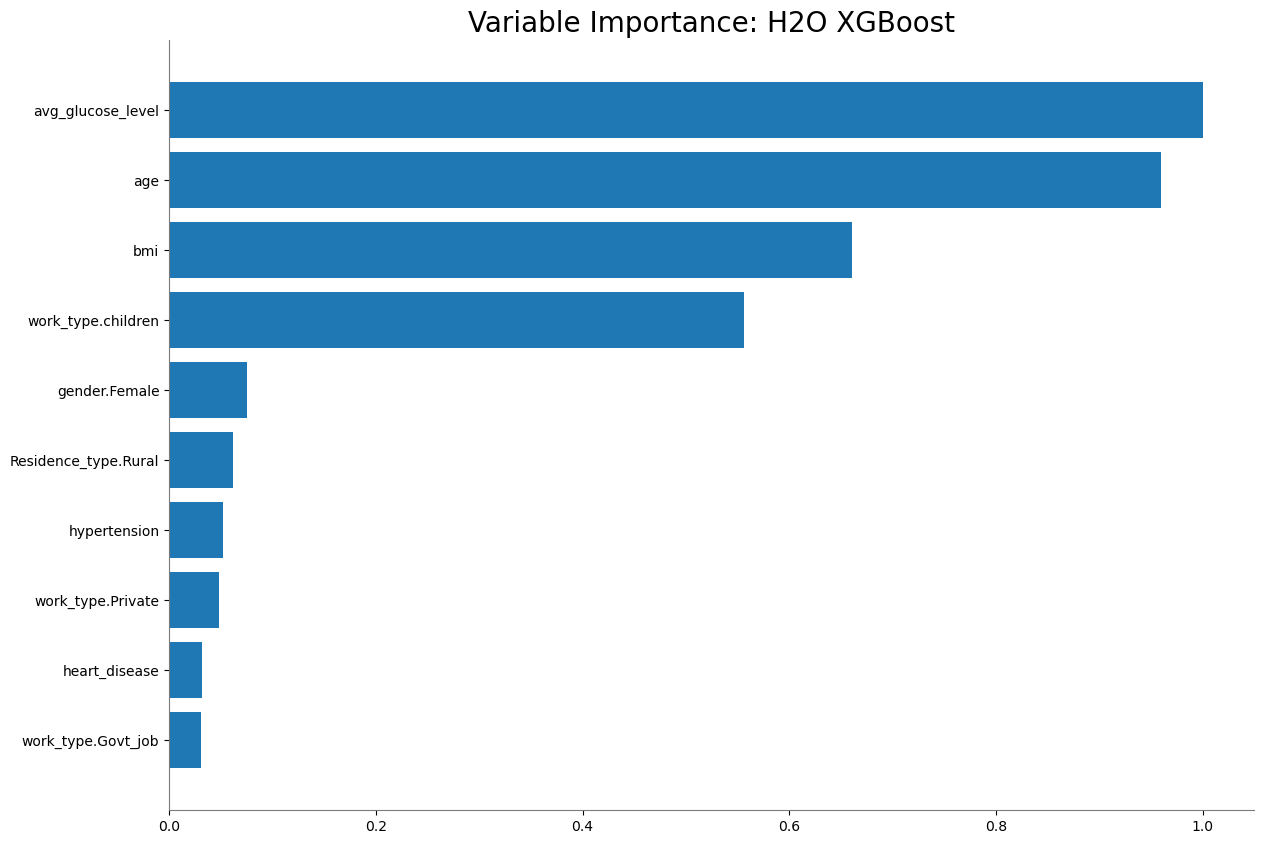

<Figure size 640x480 with 0 Axes>

In [39]:
multi_xgb.varimp_plot()

In [38]:
hyper_params1 = {
    'gamma':[1,9],
    'learn_rate': [0.01,0.7,0.001],
    'min_child_weight': [0, 7, 1],
    'ntrees': [50,60],
    'reg_alpha': [0.01,0.001,0],
    'reg_lambda': [0,0.1],
    'max_depth': [1,3,6]
    }

grid1 = H2OGridSearch(model=H2OXGBoostEstimator, grid_id='xgb_grid1',
                          hyper_params=hyper_params1)
#Train grid search
grid1.train(x=x, 
           y=target2,
           training_frame=train)
xgb_gridperf2 = grid1.get_grid(sort_by='auc', decreasing=True)
xgb_gridperf2

xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%


,gamma,learn_rate,max_depth,min_child_weight,ntrees,reg_alpha,reg_lambda,model_ids,auc
,1.0,0.01,1.0,0.0,50.0,0.01,0.0,xgb_grid1_model_1,nan
,9.0,0.7,3.0,0.0,50.0,0.01,0.0,xgb_grid1_model_10,nan
,9.0,0.7,3.0,1.0,60.0,0.01,0.0,xgb_grid1_model_100,nan
,1.0,0.001,3.0,1.0,60.0,0.01,0.0,xgb_grid1_model_101,nan
,9.0,0.001,3.0,1.0,60.0,0.01,0.0,xgb_grid1_model_102,nan
,1.0,0.01,6.0,1.0,60.0,0.01,0.0,xgb_grid1_model_103,nan
,9.0,0.01,6.0,1.0,60.0,0.01,0.0,xgb_grid1_model_104,nan
,1.0,0.7,6.0,1.0,60.0,0.01,0.0,xgb_grid1_model_105,nan
,9.0,0.7,6.0,1.0,60.0,0.01,0.0,xgb_grid1_model_106,nan
,1.0,0.001,6.0,1.0,60.0,0.01,0.0,xgb_grid1_model_107,nan


#### Evaluation
When we choose smoke_status as target variable and make multiclass classification, here the XGBoost model perform better than GLM and has lower logloss,better MSE and AUC value.<br>
And in the XGBoost model's variable importance plot, we can find that 'avg_glucose_level' has significant relation with 'smoke_status'. Also predictor variables are independent of others can be observed from correlation metric.
For regularization, we still choose glm as the basic model with hyperparameter value(lambda_ = 1e-500,alpha=1). Compare performance metrics, glm with Ridge Regression does performs slightly better than glm with out regularization.<br>
the hyperparameter 'max_depth' default to be 6, higher value will cause overfitting, so we tuning it under 6.
XGB's important hyperparameter are lear_rate,gamma, reg_lambda,reg_alpha,max_depth, min_child_weight, and in this experiment, XGB with hyperparameter(gamma=0, learn_rate=.01, max_depth=1, min_child_weight=0, ntrees=50, reg_alpha=.01, reg_lambda=0) has best performance.

### Regression
Here we set age as our target(response) variable, and use GeneralizedLinear model and GradientBoosting model tarined with data and make prediction.

In [59]:
#Reading the brain stroke data
data=pd.read_csv("full_data.csv")
# upload data frame in H2O environment
df = h2o.H2OFrame(data)
# convert target to categorical
df['stroke'] = df['stroke'].asfactor()
target2='age'
x = df.columns
x.remove(target2)
print(x)

# train / test split (70/30)
train, test = df.split_frame(seed=1)
train['stroke'] = train['stroke'].asfactor()
test['stroke'] = test['stroke'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [60]:
df.cor()

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,-0.0265384,0.0214848,0.0864755,-0.0289711,nan,-0.00430116,0.0557959,-0.0120929,nan,0.00886987
-0.0265384,1,0.27812,0.264852,0.677137,nan,0.0171545,0.236763,0.373703,nan,0.246478
0.0214848,0.27812,1,0.111974,0.164534,nan,-0.00475503,0.170028,0.158762,nan,0.131965
0.0864755,0.264852,0.111974,1,0.114765,nan,0.00212545,0.166847,0.0609265,nan,0.13461
-0.0289711,0.677137,0.164534,0.114765,1,nan,0.00819076,0.150724,0.37169,nan,0.108398
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-0.00430116,0.0171545,-0.00475503,0.00212545,0.00819076,nan,1,0.00134561,0.0131849,nan,0.0164941
0.0557959,0.236763,0.170028,0.166847,0.150724,nan,0.00134561,1,0.186348,nan,0.133227
-0.0120929,0.373703,0.158762,0.0609265,0.37169,nan,0.0131849,0.186348,1,nan,0.0569257
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


There are no strong correlation, so no multicorrlinearity and no assumptions violated.

In [61]:
multi_glm = H2OGeneralizedLinearEstimator(family= "AUTO",
                                          lambda_ = 0)    
multi_glm.train(x=x, y=target2, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1667875487106_1507


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              14                            14                             1                       py_528_sid_be51

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 173.23352674410896
RMSE: 13.161820798966568
MAE: 10.329635839962616
RMSLE: 0.40194887645760524
Mean Residual Deviance: 173.23352674410896
R^2: 0.6670914034936695
Null degrees of freedom: 3748
Residual degrees of freedom: 3734
Null deviance: 1950843.2602199672
Residual deviance: 649452.4917636645
AIC: 29995.948543248243

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2022-11-07 22:19:06  0.000 sec   0             1950843.260227258          520.3636330294099
    2022-11-07 22:19:06  0.096 sec   1                                                           13.161820798966568  173.23352674410896   10.329635839962616  0.6670914034936695

Variable Importances: 
variable                        relative_importance    scaled_importance    percentage
------------------------------  ---------------------  -------------------  ------------
work_type.children              25.8865                1                    0.318007
ever_married.Yes                18.5851                0.717947             0.228312
stroke.1                        12.7457                0.492369             0.156577
work_type.Self-employed         7.00754                0.270703             0.0860853
smoking_status.formerly smoked  3.66588                0.141614             0.0450341
heart_disease                   3.10976                0.12013              0.0382023
work_type.Private               2.99046                0.115522             0.0367368
hypertension                    2.3576                 0.0910746            0.0289623
smoking_status.smokes           2.11124                0.0815577            0.0259359
avg_glucose_level               1.76415                0.0681495            0.021672
Residence_type.Urban            0.483546               0.0186795            0.00594019
smoking_status.never smoked     0.441177               0.0170427            0.0054197
gender.Male                     0.202555               0.00782474           0.00248832
bmi                             0.0511161              0.00197462           0.000627944

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [62]:
withRegular_glm = H2OGeneralizedLinearEstimator(family= "AUTO",
                                          lambda_ = 1e-500,alpha=1,auc_type='WEIGHTED_OVR')  
withRegular_glm.train(x=x, y=target2, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1667875487106_1508


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              14                            14                             1                       py_528_sid_be51

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 173.23352674410896
RMSE: 13.161820798966568
MAE: 10.329635839962616
RMSLE: 0.40194887645760524
Mean Residual Deviance: 173.23352674410896
R^2: 0.6670914034936695
Null degrees of freedom: 3748
Residual degrees of freedom: 3734
Null deviance: 1950843.2602199672
Residual deviance: 649452.4917636645
AIC: 29995.948543248243

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2022-11-07 22:19:07  0.000 sec   0             1950843.260227258          520.3636330294099
    2022-11-07 22:19:07  0.015 sec   1                                                           13.161820798966568  173.23352674410896   10.329635839962616  0.6670914034936695

Variable Importances: 
variable                        relative_importance    scaled_importance    percentage
------------------------------  ---------------------  -------------------  ------------
work_type.children              25.8865                1                    0.318007
ever_married.Yes                18.5851                0.717947             0.228312
stroke.1                        12.7457                0.492369             0.156577
work_type.Self-employed         7.00754                0.270703             0.0860853
smoking_status.formerly smoked  3.66588                0.141614             0.0450341
heart_disease                   3.10976                0.12013              0.0382023
work_type.Private               2.99046                0.115522             0.0367368
hypertension                    2.3576                 0.0910746            0.0289623
smoking_status.smokes           2.11124                0.0815577            0.0259359
avg_glucose_level               1.76415                0.0681495            0.021672
Residence_type.Urban            0.483546               0.0186795            0.00594019
smoking_status.never smoked     0.441177               0.0170427            0.0054197
gender.Male                     0.202555               0.00782474           0.00248832
bmi                             0.0511161              0.00197462           0.000627944

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [63]:
from h2o.estimators import H2OGradientBoostingEstimator
multi_gbm = H2OGradientBoostingEstimator(nfolds=5,keep_cross_validation_predictions = True)
multi_gbm.train(x=x, y=target2, training_frame=train)
#multi_xgb.predict(test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1667875487106_1509


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          19290                  5            5            5             20            31            26

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 136.4641164680463
RMSE: 11.681785671208248
MAE: 8.934177613383168
RMSLE: 0.3579276768934654
Mean Residual Deviance: 136.4641164680463

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 163.319211177459
RMSE: 12.779640494844095
MAE: 9.815048387128373
RMSLE: 0.38097444418962473
Mean Residual Deviance: 163.319211177459

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     9.8217    0.255105    9.66766       10.1881       9.84871       9.51102       9.893
mean_residual_deviance  163.574   9.55354     157.501       177.688       165.675       152.455       164.551
mse                     163.574   9.55354     157.501       177.688       165.675       152.455       164.551
r2                      0.684977  0.0248093   0.680477      0.652559      0.674769      0.717923      0.699159
residual_deviance       163.574   9.55354     157.501       177.688       165.675       152.455       164.551
rmse                    12.7853   0.371869    12.5499       13.33         12.8715       12.3473       12.8277
rmsle                   0.380853  0.00923226  0.391091      0.384683      0.386345      0.371075      0.371071

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2022-11-07 22:19:08  1.324 sec   0.0                22.811480290140445  19.292234984522462  520.363633027466
     2022-11-07 22:19:08  1.343 sec   1.0                21.308899241028154  18.111540776697055  454.0691868642902
     2022-11-07 22:19:08  1.348 sec   2.0                20.00849552760524   17.07497126123577   400.339893278199
     2022-11-07 22:19:08  1.351 sec   3.0                18.88234799739504   16.157085799640672  356.5430658947285
     2022-11-07 22:19:08  1.353 sec   4.0                17.91260171487876   15.357921422151891  320.8613001958775
     2022-11-07 22:19:08  1.355 sec   5.0                17.07645496429572   14.652479444834892  291.60531414762
     2022-11-07 22:19:08  1.358 sec   6.0                16.357671574969114  14.025424890504356  267.5734193545525
     2022-11-07 22:19:08  1.361 sec   7.0                15.74327476985719   13.475967728640914  247.850700479222
     2022-11-07 22:19:08  1.364 sec   8.0                15.214971980688661  12.984581250962686  231.49537237314104
     2022-11-07 22:19:08  1.368 sec   9.0                14.765642412575826  12.552292629575597  218.02419585605807
---  ---                  ---         ---                ---                 ---                 ---
     2022-11-07 22:19:08  1.454 sec   41.0               11.862020808794703  9.100138056279024   140.70753766827855
     2022-11-07 22:19:08  1.456 sec   42.0               11.84440635281332   9.077859690556465   140.2899618505645
     2022-11-07 22:19:08  1.460 sec   43.0               11.831232094273712  9.063928047289973   139.97805286857235
     2022-11-07 22:19:08  1.463 sec   44.0               11.818478450052435  9.047142122424772   139.676432

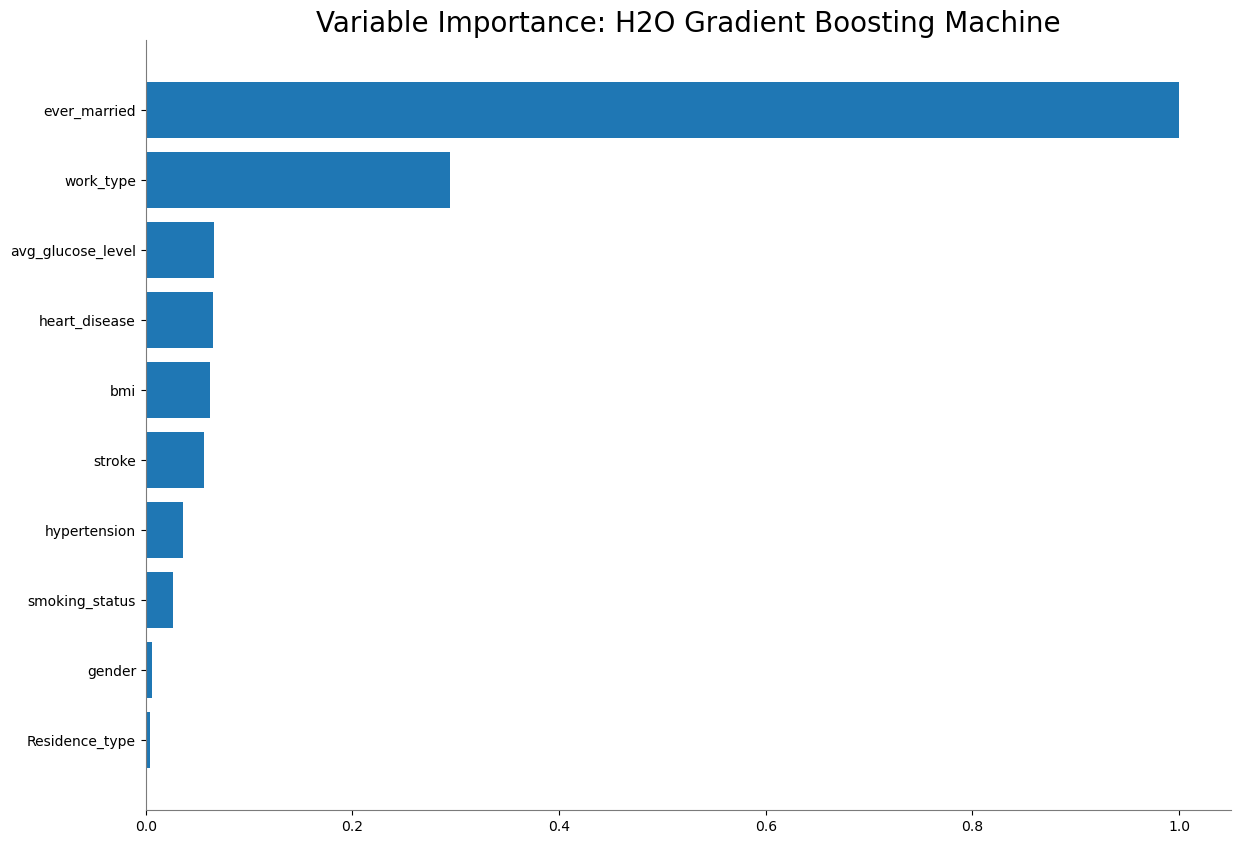

<Figure size 640x480 with 0 Axes>

In [64]:
multi_gbm.varimp_plot()

In [65]:
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
gbm_grid1.train(x=x, y=target2,
                training_frame=train,
                ntrees=100,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf1 = gbm_grid1.get_grid( decreasing=True)
gbm_gridperf1

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,1.0,0.1,9.0,0.8,gbm_grid1_model_18,75.5124436
,0.5,0.1,9.0,0.8,gbm_grid1_model_17,82.8596361
,0.5,0.1,9.0,1.0,gbm_grid1_model_35,88.0422015
,1.0,0.1,9.0,1.0,gbm_grid1_model_36,89.9575847
,0.2,0.1,9.0,0.8,gbm_grid1_model_16,111.4864681
,0.2,0.1,9.0,1.0,gbm_grid1_model_34,112.4952018
,1.0,0.1,5.0,0.8,gbm_grid1_model_12,124.5362913
,1.0,0.1,5.0,1.0,gbm_grid1_model_30,126.5153794
,0.5,0.1,5.0,1.0,gbm_grid1_model_29,126.7456815
,0.5,0.1,5.0,0.8,gbm_grid1_model_11,127.8549752


#### Evaluation
When we choose 'age' as target to make regression, GradientBoosting model here is perform better than GLM. GBM has lower MSE. In GBM, 'ever_married' is significant independent variable and has important relation with response variable.
When make regression prediction in this dataset with 'age' as response variable, GLM with regularizaition does not perform better.
The hyperparameter 'learn_rate','max_depth','sample_rate','col_sample_rate' are important and in this hyperparameter tuning experiment, GBM with col_sample_rate=1.0,learn_rate=0.1,max_depth=9.0,sample_rate=0.8 has lowest residual_deviance and is able to predict the value of the response variable better.

In [66]:
h2o.cluster().shutdown()

H2O session _sid_be51 closed.




### References
[1] https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html#interpreting-a-gbm-model<br>
[2] https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html?highlight=hyperparameter#grid-search-in-r-and-python<br>
[3] https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html?highlight=hyperparameter#grid-search-in-r-and-python<br>
[4] https://www.kaggle.com/code/docxian/stroke-prediction<br>

Above code were referred directly from the h2o document and kaggle notebook[4] with some argument and variables adjustment and modification.

Copyright 2022 Yanping Fu<br>
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.